# **Diabetes Prediction**

- Created by : Kuda Tinta Team
- Member     : 
  - Andira Dzulkarnain (https://www.linkedin.com/in/andzlkrn)
  - Clara Palupi (https://www.linkedin.com/in/palupiclr)
  - Deryl Baharudin Sopandi (https://www.linkedin.com/in/derylbaharudin)
  - Siti Chairani Nabiilah (https://www.linkedin.com/in/schanabiilah)
  - Wahyu Illahi (https://www.linkedin.com/in/wahyu-illah01)


# **Business Problem and Data Understanding**

### **Context**

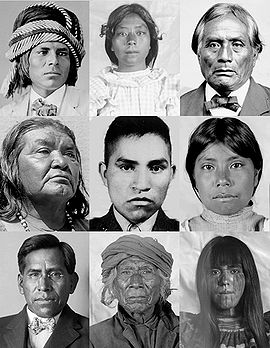

Source: [Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

This dataset provided by Digital Skola which taken from the original version of the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## **Define Business Problem**

### **Problem**

The Pima Indians have the highest rate of type 2 diabetes in the world. While biomedical studies have identified a genetic variable associated with the high prevalence of diabetes among Pima Indians, genetics is only one factor that encompasses an individual’s risk for developing a disease. Information on the social factors relating to the development of type 2 diabetes amongst this population is necessary. While genetic factors have shown to be important predictors of diabetes incidence, the historical and social factors that changed US Pima Indians’ lifestyles are significant factors which have contributed to the high prevalence of diabetes among this group. The dataset gives some characteristics (pregnancies, blood pressure, insulin level, etc.) related to people who either have diabetes or do not.

Source: [CORE Uk](https://core.ac.uk)

Based on this background, this problem is classified as a classification problem. We will create a predictive model for this classification problem using machine learning. In machine learning, there are two classes, Supervised learning and unsupervised learning. For this classification problem, we use supervised learning because this dataset has binary diabetes labels.

### **Goals**

It would be better and more effective if each patient know whether have diabetes or not, so they can maximized the treatment for better condition in the future.

The goals are:
1. Create a machine learning model to predict patient who most likely have diabetes, so they can maximize treatment for diabetics thus that their health condition is better in the future. Our target is to create a machine learning with good performance to predict patient's diabetic diagnose.

2. Find out which factors that can influence a diabetic diagnosis, so that patient can determine more effective future handling based on their condition.

3. Deploy the model that has been made into a website-based system to make predictions.

### **Analytics Approach**

These are the following steps that will be performed to complete the task:

1. Loading the data & Do data conditioning
2. Do Exploratory Data Analysis (EDA) to gain more insight regarding the problem
3. Pre-processing the data
4. Modeling the Data
5. Search for optimal parameters of the model 
6. Evaluate the Model
7. Conclusions & recomendations
8. Data Deployment

### **Evaluation Metrics**

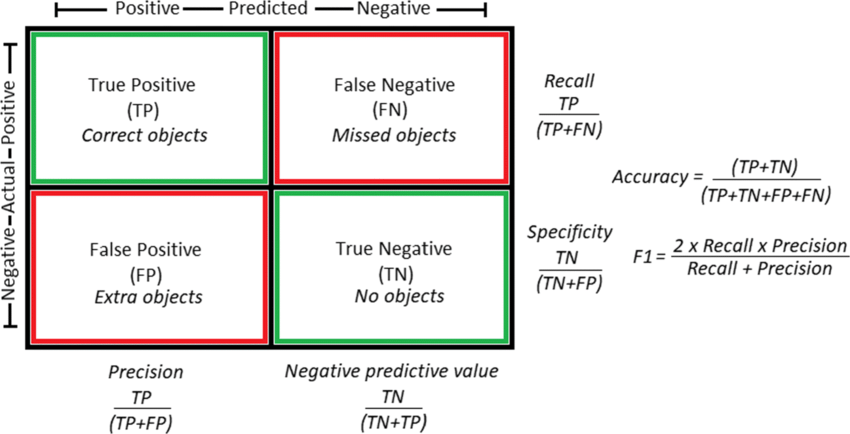

Source: [www.researchgate.net](https://www.researchgate.net/figure/Confusion-matrix-and-performance-evaluation-metrics_fig5_346062755)

Evaluation metrics that can be used for classification problems are:
1. Accuracy: How accurate is the prediction of the model.
2. Precision: How well the model predicts its positive label.
3. Recall: How well the model predicts positive data.
4. F1-Score: Harmonic mean (Representative) between precision and recall.
5. ROC-AUC: How confident is the model in making predictions.

The label in the dataset is 'Outcome' with the value:
- 'no': No Diabetes
- 'yes': Diabetes

In the Confusion matrix there are 4 classes of prediction results, namely:
1. True Positive (TP): People who are predicted to be diabetic and are actually diabetic.
2. True Negative (TN): People who are predicted not to be diabetic and actually are not.
3. False Positive (FP): People who are predicted to have diabetes but are not actually diabetic.
4. False Negative (FN): People who are predicted not to be diabetic but are actually diabetic.

In the case of diabetes predictions there are several considerations in wrong predictions:
1. False Negative (FN): It is dangerous for the person because the diabetic person does not know that he has diabetes, so there is no treatment for them in dealing with diabetes problems.
2. False Positive (FP): Loss of time and cost due to treatment even though the treatment is not needed. Furthermore, there is a potential effect on health conditions when treating diabetes in people who are not diabetic.

From these considerations, we will choose the ROC-AUC evaluation matrix to increase the confidence of the model in making predictions so as to minimize wrong predictions (FP and FN).

## **Data Understanding**

### **Data Source**

The data source used is a csv file provided from Digital Skola

### **Dataset Description**

Sumber data yang digunakan adalah file csv yang diberikan dari Digital Skola. Dataset ini adalah modifikasi dari dataset diabetes dari Kaggle.

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

Sources:
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990

### **Attributes Information**

Input Variables:
- `Pregnancies`: Number of times pregnant.
- `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- `BloodPressure`: Diastolic blood pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour serum insulin (mu U/ml)
- `BMI`: Body mass index (weight in kg/(height in m)^2)
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)

Output Variable (Desired Target):
- `Outcome`: has the person indicated positively diabetes (binary: 1, 0)

# **Import Dataset and Libraries**

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Library   
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
# from dython.nominal import associations
# from dython.nominal import identify_nominal_columns

# Data Analysis
from scipy.stats import normaltest

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import RocCurveDisplay, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
    
# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Model Deployment
import pickle

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Save Figures to Google Drive
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [4]:
df = pd.read_csv('/gdrive/MyDrive/Portfolio - Deryl Baharudin Sopandi/Diabetes Prediction/dataset/diabetes_prediction.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Conditioning**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Modify Column's Name**

In [7]:
df = df.rename(columns={
                'Pregnancies':'pregnancies',
                'Glucose':'glucose',
                'BloodPressure':'blood_pressure',
                'SkinThickness':'skin_thickness',
                'Insulin':'insulin',
                'BMI':'bmi',
                'DiabetesPedigreeFunction':'diabetes_pedigree',
                'Age':'age',
                'Outcome':'y'})

# **Explanatory Data Analysis (EDA)**

In [8]:
df_eda = df.copy()

In [9]:
df_eda['y'].replace(1, 'yes', inplace = True)
df_eda['y'].replace(0, 'no', inplace = True)

## **1. Missing Value, Anomaly, Outlier, Duplicated Data Detection**

### **Missing Value Detection**

In [10]:
listItem = []
for col in df_eda.columns :
    listItem.append([col, df_eda[col].dtype, df_eda[col].isna().sum(), round((df_eda[col].isna().sum()/len(df_eda[col])) * 100,2),
                    df_eda[col].nunique(), list(df_eda[col].drop_duplicates().sample(2).values)]);

df_edaDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_edaDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,pregnancies,int64,0,0.0,17,"[15, 4]"
1,glucose,int64,0,0.0,136,"[111, 126]"
2,blood_pressure,int64,0,0.0,47,"[85, 61]"
3,skin_thickness,int64,0,0.0,51,"[41, 46]"
4,insulin,int64,0,0.0,186,"[67, 265]"
5,bmi,float64,0,0.0,248,"[30.8, 38.5]"
6,diabetes_pedigree,float64,0,0.0,517,"[0.711, 0.133]"
7,age,int64,0,0.0,52,"[55, 51]"
8,y,object,0,0.0,2,"[yes, no]"


There is no missing value indicated in the dataset

## **Data Anomalies Detection**

In [11]:
df_eda.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Several features display a minimum value of 0: glucose, blood_pressure, skin_thickness, insulin, and bmi, which are non-sense if the score is 0.

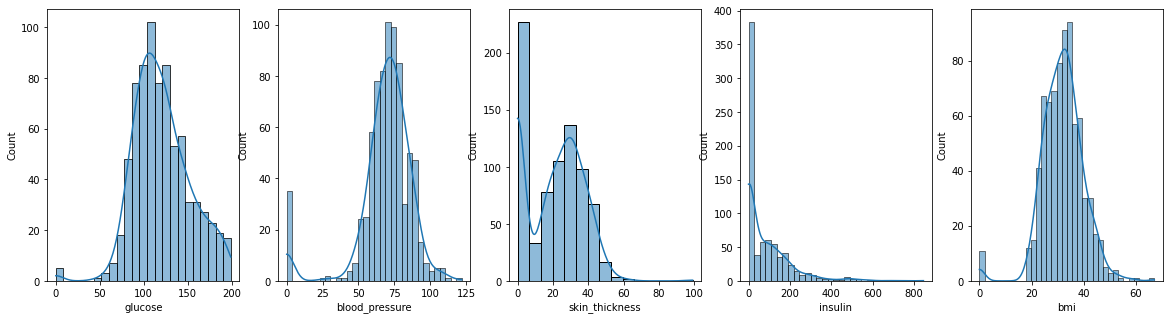

In [12]:
# See data distribution for glucose, blood_pressure, skin_thickness, insulin, and bmi
cols = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
fig = plt.figure(figsize=(20, 5))
for i in range(len(cols)):
    plt.subplot(1, 5, i+1)
    sns.histplot(df_eda[cols[i]], kde=True)

In [13]:
zero1 = df_eda[df_eda['glucose'] == 0]
zero2 = df_eda[df_eda['blood_pressure'] == 0]
zero3 = df_eda[df_eda['skin_thickness'] == 0]
zero4 = df_eda[df_eda['insulin'] == 0]
zero5 = df_eda[df_eda['bmi'] == 0]

# Calculate Percentage
zeros = [zero1, zero2, zero3, zero4, zero5]
cols = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
for i in range(5):
  pct = round(len(zeros[i])/len(df_eda[cols[i]])*100,2)
  print(f'Percentage of zero values in {cols[i]} column is {pct} %')

Percentage of zero values in glucose column is 0.65 %
Percentage of zero values in blood_pressure column is 4.56 %
Percentage of zero values in skin_thickness column is 29.56 %
Percentage of zero values in insulin column is 48.7 %
Percentage of zero values in bmi column is 1.43 %


In [14]:
zero_all = pd.concat([zero1, zero2, zero3, zero4, zero5], axis = 0)
zero_all.drop_duplicates(inplace=True)
zero_all

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y
75,1,0,48,20,0,24.7,0.140,22,no
182,1,0,74,20,23,27.7,0.299,21,no
342,1,0,68,35,0,32.0,0.389,22,no
349,5,0,80,32,0,41.0,0.346,37,yes
502,6,0,68,41,0,39.0,0.727,41,yes
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,no
761,9,170,74,31,0,44.0,0.403,43,yes
764,2,122,70,27,0,36.8,0.340,27,no
767,1,93,70,31,0,30.4,0.315,23,no


In [15]:
zero_pct = round(zero_all.shape[0]/df_eda.shape[0]*100,2)
print(f'There are {zero_pct} % zero value anomalies in the data')

There are 48.96 % zero value anomalies in the data


We use KNNImputer to assign 0 value in numerical variable with imputer based on predictive model KNN

In [16]:
knn_impute = KNNImputer(missing_values=0)
df_eda[['glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree', 'age']] = knn_impute.fit_transform(df_eda[['glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree', 'age']])

In [17]:
df_eda.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.601562,72.325781,29.096615,152.724479,32.434479,0.471876,33.240885
std,3.369578,30.494403,12.193908,9.424697,98.502206,6.883819,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,23.000000,87.450000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,131.600000,32.190000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,35.000000,191.050000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


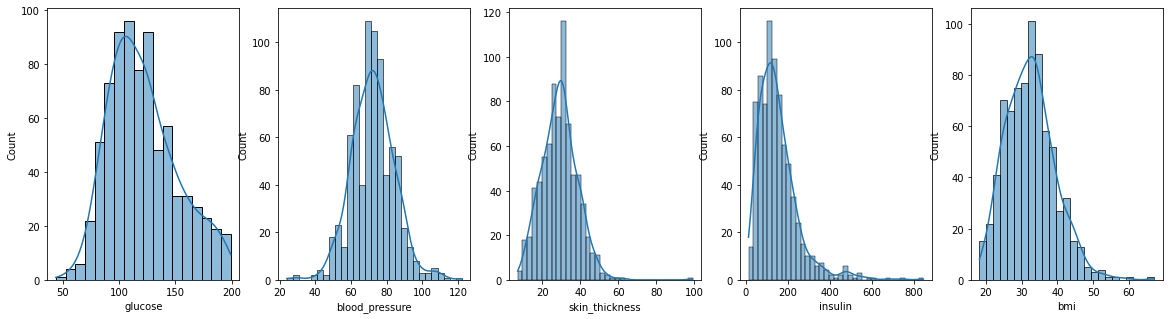

In [18]:
# See data distribution for glucose, blood_pressure, skin_thickness, insulin, and bmi after zero value handling
cols = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
fig = plt.figure(figsize=(20, 5))
for i in range(len(cols)):
    plt.subplot(1, 5, i+1)
    sns.histplot(df_eda[cols[i]], kde=True)

### **Outlier Detection**

In [19]:
numerical_cols = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree', 'age']

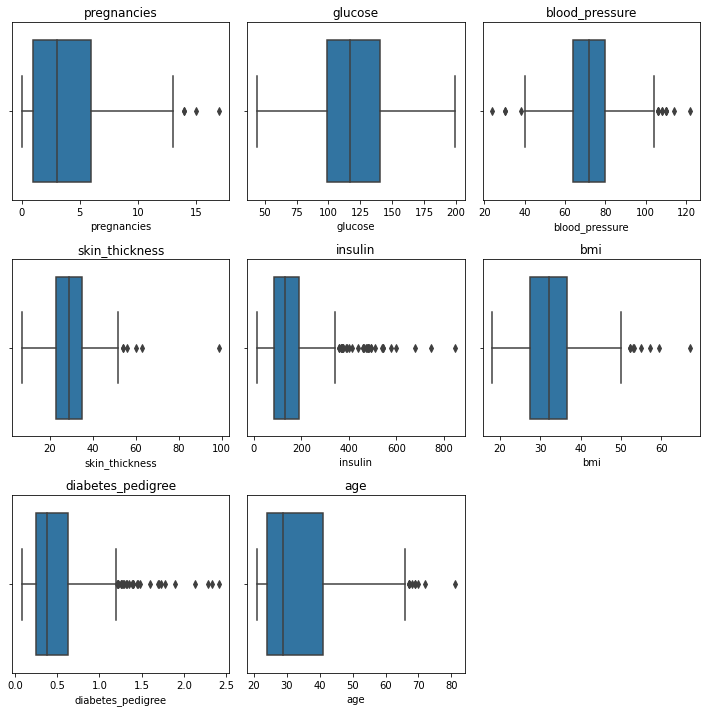

In [20]:
# plot for outliers detection
plt.figure(figsize=(10,10))
for i in range(len(df_eda[numerical_cols].columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df_eda[numerical_cols[i]])
    plt.title(df_eda.columns[i])
    
plt.tight_layout()
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
# creating function to generate IQR, lower limit, and Upper limit

def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    Lower_Limit = q1 - limit
    Upper_Limit = q3 + limit
    print(f'Lower_Limit: {Lower_Limit}')
    print(f'Upper_Limit: {Upper_Limit}')
    print('_________________________')

In [22]:
# check IQR, upper limit, and lower limit for each feature

for i in df_eda.drop(columns=['y']) :
    find_outlier(df_eda, i)

Outlier pregnancies
IQR: 5.0
Lower_Limit: -6.5
Upper_Limit: 13.5
_________________________
Outlier glucose
IQR: 41.25
Lower_Limit: 37.125
Upper_Limit: 202.125
_________________________
Outlier blood_pressure
IQR: 16.0
Lower_Limit: 40.0
Upper_Limit: 104.0
_________________________
Outlier skin_thickness
IQR: 12.0
Lower_Limit: 5.0
Upper_Limit: 53.0
_________________________
Outlier insulin
IQR: 103.60000000000002
Lower_Limit: -67.95000000000005
Upper_Limit: 346.45000000000005
_________________________
Outlier bmi
IQR: 9.100000000000001
Lower_Limit: 13.849999999999998
Upper_Limit: 50.25
_________________________
Outlier diabetes_pedigree
IQR: 0.38249999999999995
Lower_Limit: -0.32999999999999996
Upper_Limit: 1.2
_________________________
Outlier age
IQR: 17.0
Lower_Limit: -1.5
Upper_Limit: 66.5
_________________________


In [23]:
# creating outliers columns
out1 = df_eda[df_eda['pregnancies'] > 13.5]
out2 = df_eda[(df_eda['glucose'] < 37.125) & (df_eda['glucose'] > 202.125)]
out3 = df_eda[(df_eda['blood_pressure'] < 40) & (df_eda['blood_pressure'] > 104)]
out4 = df_eda[(df_eda['skin_thickness'] < 5) & (df_eda['skin_thickness'] > 53)]
out5 = df_eda[df_eda['insulin'] > 346.45]
out6 = df_eda[(df_eda['bmi'] < 13.85) & (df_eda['bmi'] > 50.25)]
out7 = df_eda[df_eda['diabetes_pedigree'] > 1.2]
out8 = df_eda[df_eda['age'] > 66.5]

In [24]:
# creating outliers dataframe

out_all = pd.concat([out1, out2, out3, out4, out5, out6, out7, out8], axis = 0)
out_all.drop_duplicates(inplace=True)
out_all

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43.0,yes
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47.0,yes
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46.0,yes
455,14,175.0,62.0,30.0,159.8,33.6,0.212,38.0,yes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,yes
...,...,...,...,...,...,...,...,...,...
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81.0,no
537,0,57.0,60.0,31.8,108.4,21.7,0.735,67.0,no
666,4,145.0,82.0,18.0,149.2,32.5,0.235,70.0,yes
674,8,91.0,82.0,31.4,142.6,35.6,0.587,68.0,no


In [25]:
#check outliers percentage

print('Percentage Outlier')
len(out_all)/len(df_eda)*100

Percentage Outlier


9.114583333333332

In [26]:
df_eda.drop(labels=out_all.index, axis=0, inplace=True)

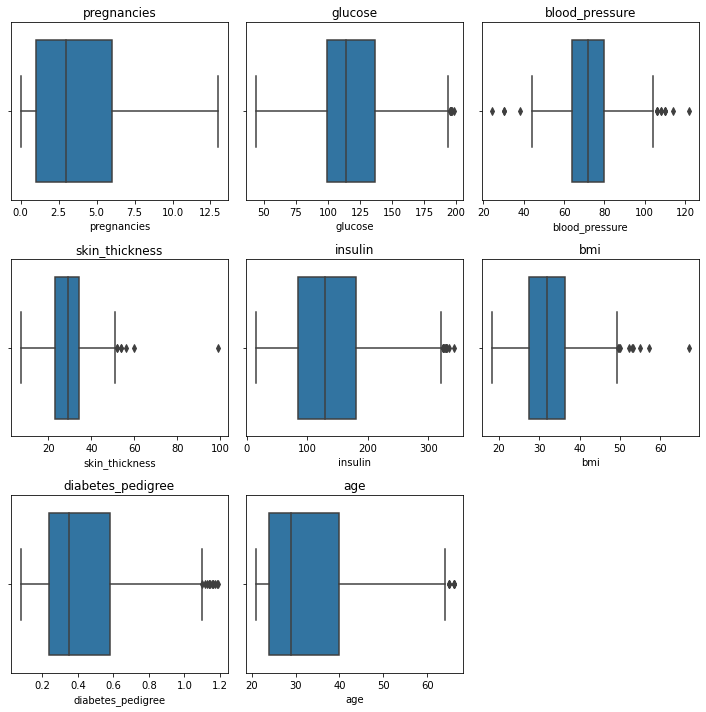

In [27]:
# plot for outliers detection after removing outliers
plt.figure(figsize=(10,10))
for i in range(len(df_eda[numerical_cols].columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df_eda[numerical_cols[i]])
    plt.title(df_eda.columns[i])
    
plt.tight_layout()
warnings.simplefilter(action='ignore', category=FutureWarning)

## **Data Duplicated Detection**

In [28]:
#check whether there is any duplicate value
df_eda[df_eda.duplicated()]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y


There is no data duplication in this dataset.

## **2. Feature Engineering**

### **a. Weight Status**

Here's the weight Classification based on BMI score:
```
|-------------------------------------------|
|       BMI Class       |     BMI Range     |
|-----------------------|-------------------|
|   Underweight         | < 18.5            |
|   Healthy weight      | 18.5 - 24.9       |
|   Overweight          | 25 - 29.9         |
|   Obesity 1           | 30 - 34.9         |
|   Obesity 2           | 35 - 39.9         |
|   Obesity 3           | > 40.0            |
|-----------------------|-------------------|
```
Source: [Centers for Disease Control and Prevention](https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=Obesity%20is%20frequently%20subdivided%20into,BMI%20of%2040%20or%20higher.)

In [29]:
bmi_bins = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df_eda['bmi_group'] = bmi_bins

df_eda.loc[df_eda['bmi'] < 18.5, 'bmi_group'] = bmi_bins[0]
df_eda.loc[(df_eda['bmi'] >= 18.5) & (df_eda['bmi'] <= 24.9), 'bmi_group'] = bmi_bins[1]
df_eda.loc[(df_eda['bmi'] > 24.9) & (df_eda['bmi'] <= 29.9), 'bmi_group'] = bmi_bins[2]
df_eda.loc[(df_eda['bmi'] > 29.9) & (df_eda['bmi'] <= 34.9), 'bmi_group'] = bmi_bins[3]
df_eda.loc[(df_eda['bmi'] > 34.9) & (df_eda['bmi'] <= 39.9), 'bmi_group'] = bmi_bins[4]
df_eda.loc[df_eda['bmi'] > 39.9 ,'bmi_group'] = bmi_bins[5]

df_eda['bmi_group'].unique()

['Obesity 1', 'Overweight', 'Normal', 'Obesity 2', 'Obesity 3', 'Underweight']
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight',
                         'Underweight']

In [30]:
df_eda.sample(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y,bmi_group
270,10,101.0,86.0,37.0,120.6,45.6,1.136,38.0,yes,Obesity 3
713,0,134.0,58.0,20.0,291.0,26.4,0.352,21.0,no,Overweight
198,4,109.0,64.0,44.0,99.0,34.8,0.905,26.0,yes,Obesity 1
525,3,87.0,60.0,18.0,61.8,21.8,0.444,21.0,no,Normal
129,0,105.0,84.0,31.6,173.2,27.9,0.741,62.0,yes,Overweight
173,1,79.0,60.0,42.0,48.0,43.5,0.678,23.0,no,Obesity 3
750,4,136.0,70.0,29.4,124.0,31.2,1.182,22.0,yes,Obesity 1
652,5,123.0,74.0,40.0,77.0,34.1,0.269,28.0,no,Obesity 1
702,1,168.0,88.0,29.0,174.0,35.0,0.905,52.0,yes,Obesity 2
271,2,108.0,62.0,32.0,56.0,25.2,0.128,21.0,no,Overweight


### **b. Insulin Status**

Here's the insulin status based on 2-Hour serum insulin Level (1 IU/L = 1 mIU/mL):
```
|-----------------------------------------|
|  Diabetes Diagnostic  | Insulin (IU/L)  |
|-----------------------|-----------------|
|  Normal               |  16-166 mIU/L   |
|-----------------------|-----------------|
```

Source: [Diabetes Education Online](https://dtc.ucsf.edu/types-of-diabetes/type2/understanding-type-2-diabetes/basic-facts/diagnosing-diabetes/)

In [31]:
insulin_bins = pd.Series(['Abnormal', 'Normal', 'Abnormal'], dtype = "category")

df_eda['insulin_stat'] = insulin_bins

df_eda.loc[df_eda['insulin'] < 16, 'insulin_stat'] = insulin_bins[0]
df_eda.loc[(df_eda['insulin'] >= 16) & (df_eda['insulin'] <= 166), 'insulin_stat'] = insulin_bins[1]
df_eda.loc[df_eda['insulin'] > 166 ,'insulin_stat'] = insulin_bins[2]

df_eda['insulin_stat'].unique()

['Abnormal', 'Normal']
Categories (2, object): ['Abnormal', 'Normal']

In [32]:
df_eda.sample(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y,bmi_group,insulin_stat
717,10,94.0,72.0,18.0,150.0,23.1,0.595,56.0,no,Normal,Normal
576,6,108.0,44.0,20.0,130.0,24.0,0.813,35.0,no,Normal,Normal
651,1,117.0,60.0,23.0,106.0,33.8,0.466,27.0,no,Obesity 1,Normal
539,3,129.0,92.0,49.0,155.0,36.4,0.968,32.0,yes,Obesity 2,Normal
326,1,122.0,64.0,32.0,156.0,35.1,0.692,30.0,yes,Obesity 2,Normal
256,3,111.0,56.0,39.0,107.0,30.1,0.557,30.0,no,Obesity 1,Normal
183,5,73.0,60.0,23.4,41.4,26.8,0.268,27.0,no,Overweight,Normal
734,2,105.0,75.0,26.0,167.6,23.3,0.560,53.0,no,Normal,Abnormal
730,3,130.0,78.0,23.0,79.0,28.4,0.323,34.0,yes,Overweight,Normal
168,4,110.0,66.0,29.4,107.4,31.9,0.471,29.0,no,Obesity 1,Normal


### **c. Glucose Status**

Here's the diabetes diagnostic criteria based on 2-hr Oral Glucose Tolerance Test (OGTT) Glucose Level:
```
|-----------------------------------------|
|  Diabetes Diagnostic  | Glucose (mg/dl) |
|-----------------------|-----------------|
|  Normal               |     < 140       |
|  Pre-diabetes         |    140-199      |
|  Diabetes             |     > 199       |
|-----------------------|-----------------|
```

Source: [Diabetes Education Online](https://dtc.ucsf.edu/types-of-diabetes/type2/understanding-type-2-diabetes/basic-facts/diagnosing-diabetes/)

In [33]:
glucose_bins = pd.Series(['Normal', 'Pre-diabetes', 'Diabetes'], dtype = "category")

df_eda['glucose_stat'] = glucose_bins

df_eda.loc[df_eda['glucose'] < 140, 'glucose_stat'] = glucose_bins[0]
df_eda.loc[(df_eda['glucose'] >= 140) & (df_eda['glucose'] <= 199), 'glucose_stat'] = glucose_bins[1]
df_eda.loc[df_eda['glucose'] > 199 ,'glucose_stat'] = glucose_bins[2]

df_eda['glucose_stat'].unique()

['Pre-diabetes', 'Normal']
Categories (3, object): ['Diabetes', 'Normal', 'Pre-diabetes']

In [34]:
df_eda.sample(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y,bmi_group,insulin_stat,glucose_stat
555,7,124.0,70.0,33.0,215.0,25.50,0.161,37.0,no,Overweight,Abnormal,Normal
145,0,102.0,75.0,23.0,55.4,28.28,0.572,21.0,no,Overweight,Normal,Normal
380,1,107.0,72.0,30.0,82.0,30.80,0.821,24.0,no,Obesity 1,Normal,Normal
189,5,139.0,80.0,35.0,160.0,31.60,0.361,25.0,yes,Obesity 1,Normal,Normal
483,0,84.0,82.0,31.0,125.0,38.20,0.233,23.0,no,Obesity 2,Normal,Normal
502,6,130.6,68.0,41.0,236.2,39.00,0.727,41.0,yes,Obesity 2,Abnormal,Normal
317,3,182.0,74.0,35.0,156.6,30.50,0.345,29.0,yes,Obesity 1,Normal,Pre-diabetes
510,12,84.0,72.0,31.0,75.8,29.70,0.297,46.0,yes,Overweight,Normal,Normal
32,3,88.0,58.0,11.0,54.0,24.80,0.267,22.0,no,Normal,Normal,Normal
426,0,94.0,72.2,28.0,54.6,32.18,0.256,25.0,no,Obesity 1,Normal,Normal


### **d. Blood Pressure Status**

Here's the Blood Pressure Category based on Diastolic blood pressure (mm Hg):
```
|----------------------------------------------------------|
| Blood Pressure Status | Diastolic blood pressure (mm Hg) |
|-----------------------|----------------------------------|
| Normal                |               < 80               |
| Hypertension Stage 1  |              80 - 89             |
| Hypertension Stage 2  |               > 89               |
|-----------------------|----------------------------------|
```

Source: [Centers for Disease Control and Prevention](https://www.cdc.gov/bloodpressure/facts.htm)

In [35]:
blood_pressure_bins = pd.Series(['Normal', 'Hypertension Stage 1', 'Hypertension Stage 2'], dtype = "category")

df_eda['blood_pressure_stat'] = blood_pressure_bins

df_eda.loc[df_eda['blood_pressure'] < 80, 'blood_pressure_stat'] = blood_pressure_bins[0]
df_eda.loc[(df_eda['blood_pressure'] >= 80) & (df_eda['blood_pressure'] <= 89), 'blood_pressure_stat'] = blood_pressure_bins[1]
df_eda.loc[df_eda['blood_pressure'] > 89 ,'blood_pressure_stat'] = blood_pressure_bins[2]

df_eda['blood_pressure_stat'].unique()

['Normal', 'Hypertension Stage 2', 'Hypertension Stage 1']
Categories (3, object): ['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal']

In [36]:
df_eda.sample(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y,bmi_group,insulin_stat,glucose_stat,blood_pressure_stat
566,1,99.0,72.0,30.0,18.0,38.6,0.412,21.0,no,Obesity 2,Normal,Normal,Normal
705,6,80.0,80.0,36.0,66.8,39.8,0.177,28.0,no,Obesity 2,Normal,Normal,Hypertension Stage 1
641,4,128.0,70.0,29.0,163.6,34.3,0.303,24.0,no,Obesity 1,Normal,Normal,Normal
474,4,114.0,64.0,24.8,124.6,28.9,0.126,24.0,no,Overweight,Normal,Normal,Normal
301,2,144.0,58.0,33.0,135.0,31.6,0.422,25.0,yes,Obesity 1,Normal,Pre-diabetes,Normal
358,12,88.0,74.0,40.0,54.0,35.3,0.378,48.0,no,Obesity 2,Normal,Normal,Normal
457,5,86.0,68.0,28.0,71.0,30.2,0.364,24.0,no,Obesity 1,Normal,Normal,Normal
540,8,100.0,74.0,40.0,215.0,39.4,0.661,43.0,yes,Obesity 2,Abnormal,Normal,Normal
614,11,138.0,74.0,26.0,144.0,36.1,0.557,50.0,yes,Obesity 2,Normal,Normal,Normal
210,2,81.0,60.0,22.0,54.8,27.7,0.290,25.0,no,Overweight,Normal,Normal,Normal


In [37]:
# Saving dataframe after feature engineering as csv to further data visualization
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/df_eda.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_eda.to_csv(f)

Mounted at /content/drive


## **3. Univariate Analysis**

**Key Point:**
- 32.4% of patients in this dataset have diabetes, there is no imbalance class detected. [1](#section2)


In [38]:
df_numeric = df_eda.select_dtypes(include='number')

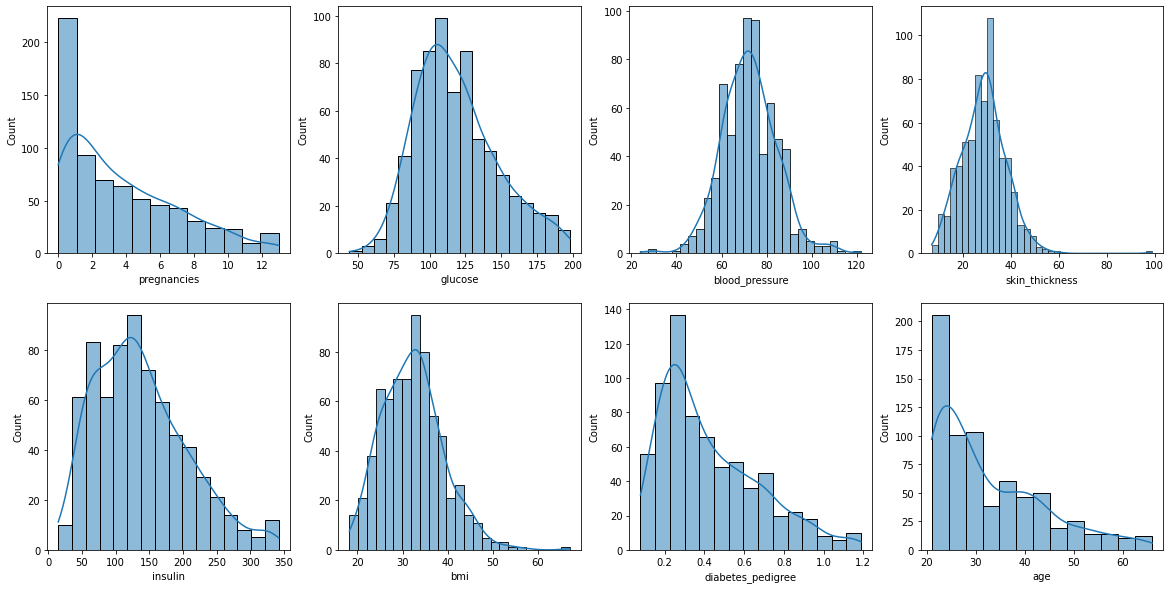

In [39]:
# creating distribution plot for analysis
fig = plt.figure(figsize=(20, 10))
for i in range(len(df_numeric.columns)):
    plt.subplot(2, 4, i+1)
    sns.histplot(df_numeric[df_numeric.columns[i]], kde=True)

In [40]:
# creating function for detailed descriptive analytic
def summary_stats(df, n=4):
    # central tendency: mean, median
    mean = pd.DataFrame(df.apply(np.mean)).T
    median = pd.DataFrame(df.apply(np.median)).T

    # distribution: ,std, min, max, range, skew, kurtosis
    std = pd.DataFrame(df.apply(np.std)).T
    min_value = pd.DataFrame(df.apply(min)).T
    max_value = pd.DataFrame(df.apply(max)).T
    range_value = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T
    skewness = pd.DataFrame(df.apply(lambda x: x.skew())).T
    kurtosis = pd.DataFrame(df.apply(lambda x: x.kurtosis())).T

    # concatenates
    summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
    summary_stats.columns = ['attributes','min','max', 'range','mean','median', 'std','skewness','kurtosis']
    
    return round(summary_stats, n)

In [41]:
summary_stats(df_numeric)

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,pregnancies,0.000,13.000,13.000,3.8023,3.0000,3.2877,0.8406,-0.1068
1,glucose,44.000,198.000,154.000,119.0931,114.5000,28.8174,0.5822,-0.0714
2,blood_pressure,24.000,122.000,98.000,72.3072,72.0000,12.2538,0.1938,1.0626
3,skin_thickness,7.000,99.000,92.000,28.8384,29.0000,9.3252,0.7181,4.0924
4,insulin,15.000,342.000,327.000,137.3819,128.4000,67.9570,0.6784,0.0488
5,bmi,18.200,67.100,48.900,32.2603,32.0000,6.7956,0.5959,0.9291
6,diabetes_pedigree,0.078,1.189,1.111,0.4273,0.3515,0.2486,0.9320,0.1709
7,age,21.000,66.000,45.000,32.6605,29.0000,11.0406,1.0547,0.3358


> **Normality Range Criteria baased on skewness and kurtosis**: The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7.

Source: [Cambridge University](https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon#:~:text=The%20values%20for%20asymmetry%20and,between%20%E2%80%907%20to%20%2B7.)

Features distribution:
- Symetric: glucose, blood_pressure, skin_thickness, bmi.
- Right Skewed: pregnancies, insulin, diabetes_predigree, age.

### **Normality Test**

In [42]:
listItem = []
for col in df_eda.columns :
    listItem.append([col, df_eda[col].dtype, df_eda[col].isna().sum(), round((df_eda[col].isna().sum()/len(df_eda[col])) * 100,2),
                    df_eda[col].nunique(), round(df_eda[col].nunique()/df_eda.shape[0]*100,2), list(df_eda[col].drop_duplicates().sample(2).values)]);

df_edaDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniquePct','uniqueSample'],
                     data=listItem)
df_edaDesc

,dataFeatures,dataType,null,nullPct,unique,uniquePct,uniqueSample
0,pregnancies,int64,0,0.0,14,2.01,"[3, 11]"
1,glucose,float64,0,0.0,136,19.48,"[89.0, 87.0]"
2,blood_pressure,float64,0,0.0,66,9.46,"[62.0, 50.0]"
3,skin_thickness,float64,0,0.0,125,17.91,"[26.8, 25.0]"
4,insulin,float64,0,0.0,409,58.60,"[145.6, 164.2]"
5,bmi,float64,0,0.0,246,35.24,"[23.3, 42.4]"
6,diabetes_pedigree,float64,0,0.0,472,67.62,"[0.13, 0.145]"
7,age,float64,0,0.0,46,6.59,"[64.0, 44.0]"
8,y,object,0,0.0,2,0.29,"[yes, no]"
9,bmi_group,category,0,0.0,6,0.86,"[Normal, Overweight]"


Since all features do not have very unique values, we chose D'Agostino and Pearson's test for normality checking instead of The Shapiro Wilk test

**Interpretation**:
- If the P-Value of the D-Agostino-Pearson Test is larger than 0.05, we assume a normal distribution.
- If the P-Value of the D-Agostino-Pearson Test is smaller than 0.05, we do not assume a normal distribution.

In [43]:
cols = df_numeric.columns
listItem = []

for col in cols:
  statistic, pvalue = normaltest(df_eda[col])
  if pvalue > 0.05:
    result = 'Assume a Normal Distribution'
  else:
    result = 'Do not Assume a Normal Distribution'
  
  listItem.append([col, pvalue, result])

df_edaNormalTest = pd.DataFrame(columns=['dataFeatures', 'P-Value', 'Assumtion'],
                     data=listItem)
df_edaNormalTest

,dataFeatures,P-Value,Assumtion
0,pregnancies,8.002499e-15,Do not Assume a Normal Distribution
1,glucose,2.582449e-08,Do not Assume a Normal Distribution
2,blood_pressure,3.511424e-05,Do not Assume a Normal Distribution
3,skin_thickness,4.846610e-27,Do not Assume a Normal Distribution
4,insulin,1.308797e-10,Do not Assume a Normal Distribution
5,bmi,1.595322e-11,Do not Assume a Normal Distribution
6,diabetes_pedigree,1.958908e-17,Do not Assume a Normal Distribution
7,age,2.992267e-21,Do not Assume a Normal Distribution


We do not assume a normal distribution for all of features in dataset. So, we will use non-parametric statistics for futrher analysis.

### **Percentage of Output Class**

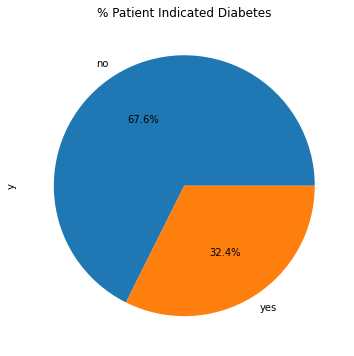

In [44]:
plt.figure(figsize=(8,6)) 
plt.title('% Patient Indicated Diabetes')
df_eda['y'].value_counts().plot(kind = "pie", autopct='%1.1f%%')

- We can see that 32.4% of the patients indicated diabetes.
- The dataset does not indicate an imbalance class between those who have diabetes and those who don't.

## **4. Bivariate Analysis**


In [45]:
df_eda1 = df_eda.copy()
df_eda1['y'].replace('yes', 1, inplace = True)
df_eda1['y'].replace('no', 0, inplace = True)
df_eda1.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y,bmi_group,insulin_stat,glucose_stat,blood_pressure_stat
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1,Obesity 1,Abnormal,Pre-diabetes,Normal
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0,Overweight,Normal,Normal,Normal
2,8,183.0,64.0,23.4,174.6,23.3,0.672,32.0,1,Normal,Abnormal,Pre-diabetes,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal,Normal,Normal
5,5,116.0,74.0,20.2,98.0,25.6,0.201,30.0,0,Overweight,Normal,Normal,Normal


In [46]:
df_eda1.select_dtypes(include='number').head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0
2,8,183.0,64.0,23.4,174.6,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5,116.0,74.0,20.2,98.0,25.6,0.201,30.0,0


### **Analysis Between Numerical Feature**

#### **Pair Plot between Numerical features**

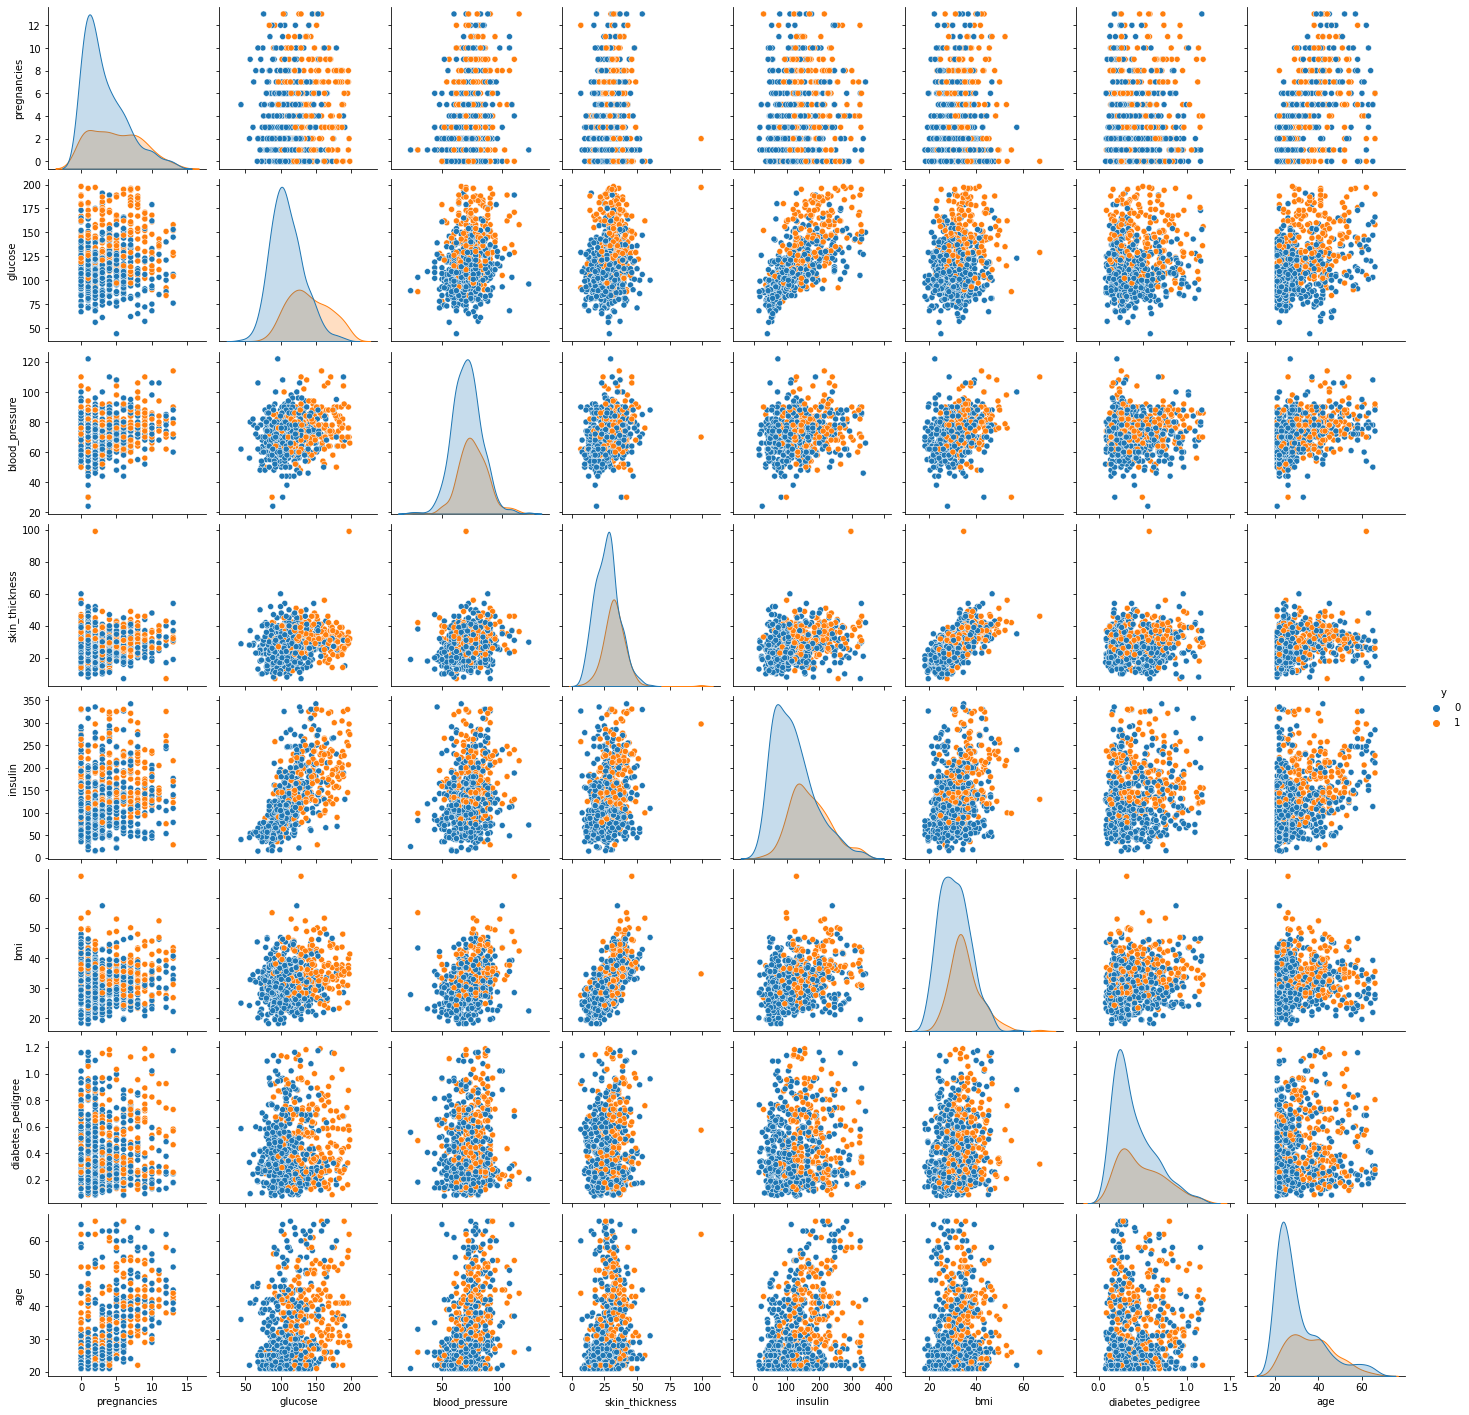

In [47]:
sns.pairplot(data = df_eda1.select_dtypes(include='number'), hue = 'y')
plt.show()

### **Diabetes Outcome by Blood Glucose Level, BMI, and Age**

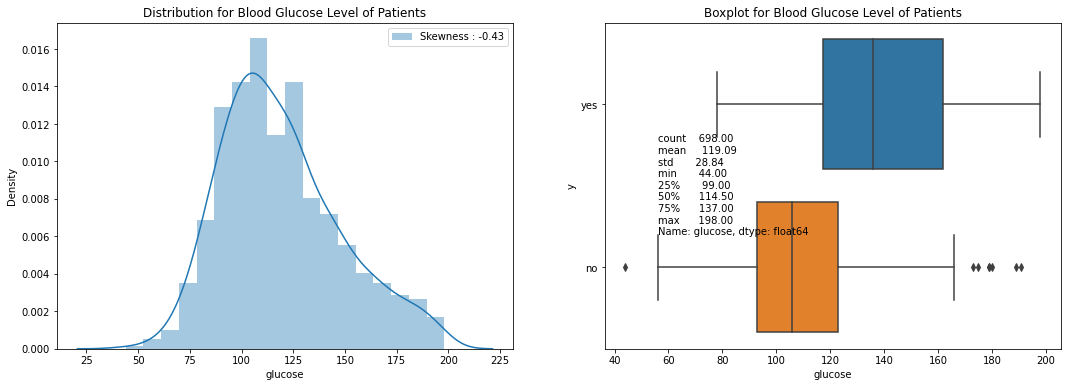

In [48]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.distplot(df_eda['glucose'], label = 'Skewness : %.2f'%(df['bmi'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Blood Glucose Level of Patients')
plt.subplot(1,2,2)
sns.boxplot(x = 'glucose', y = 'y', data = df_eda)
plt.title('Boxplot for Blood Glucose Level of Patients')
glucose = str(df_eda['glucose'].describe().round(2))
plt.text(56, 0.80, glucose)
plt.show()

Based on blood glucose levels, patients with diabetes have higher blood glucose levels than patients without diabetes

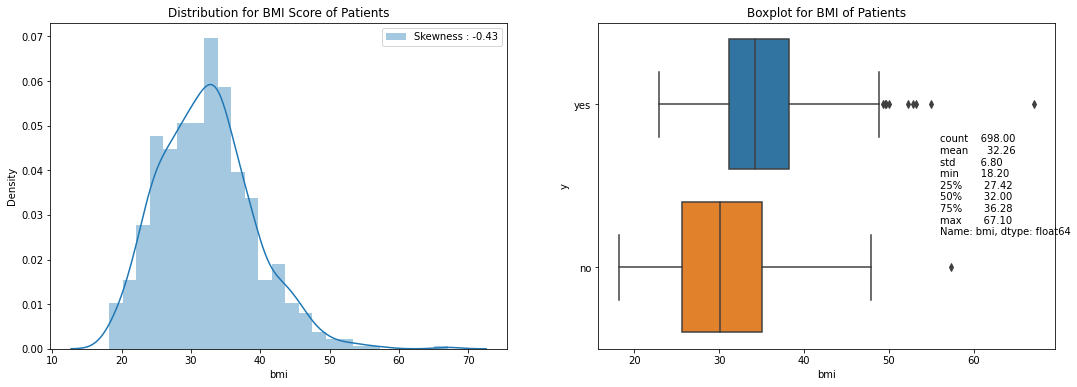

In [49]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.distplot(df_eda['bmi'], label = 'Skewness : %.2f'%(df['bmi'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for BMI Score of Patients')
plt.subplot(1,2,2)
sns.boxplot(x = 'bmi', y = 'y', data = df_eda)
plt.title('Boxplot for BMI of Patients')
bmi = str(df_eda['bmi'].describe().round(2))
plt.text(56, 0.80, bmi)
plt.show()

Based on the BMI, patients with diabetes have higher BMI than patients without diabetes

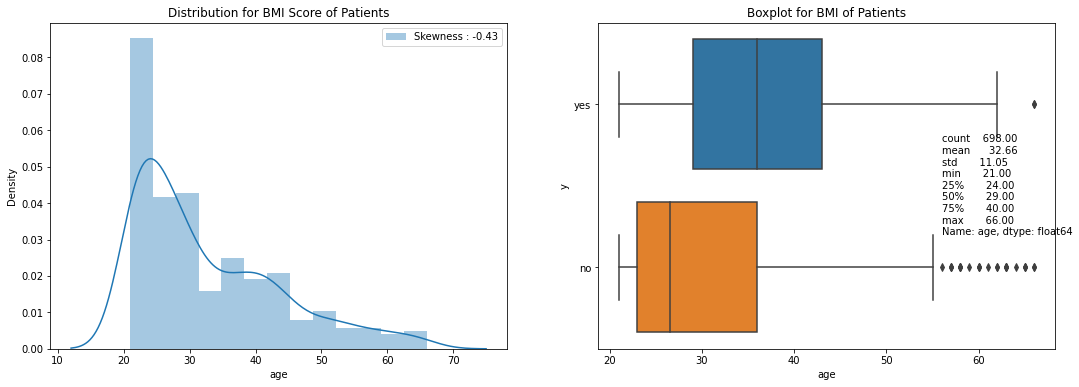

In [50]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.distplot(df_eda['age'], label = 'Skewness : %.2f'%(df['bmi'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for BMI Score of Patients')
plt.subplot(1,2,2)
sns.boxplot(x = 'age', y = 'y', data = df_eda)
plt.title('Boxplot for BMI of Patients')
age = str(df_eda['age'].describe().round(2))
plt.text(56, 0.80, age)
plt.show()

We can see that older patients are more likely to have diabetes than younger patients

### **Exploration to BMI Class**

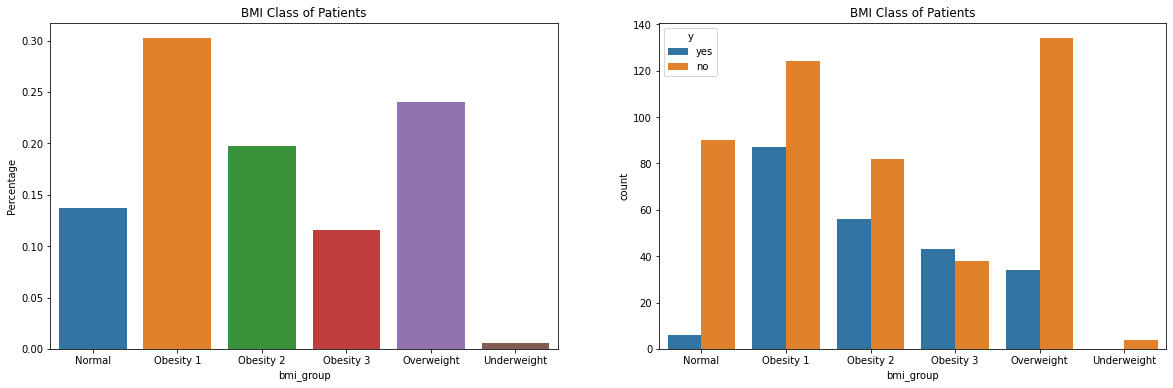

In [51]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df_eda['bmi_group'].value_counts(normalize = True).rename_axis('bmi_group').reset_index(name = 'Percentage')
sns.barplot(x = 'bmi_group', y = 'Percentage', data = eda_percentage.head(10))
plt.title('BMI Class of Patients')
plt.subplot(1,2,2)
sns.countplot(df_eda['bmi_group'], hue = df_eda['y'])
plt.title('BMI Class of Patients')
plt.show()

In [52]:
df_eda.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y,bmi_group,insulin_stat,glucose_stat,blood_pressure_stat
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,yes,Obesity 1,Abnormal,Pre-diabetes,Normal
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,no,Overweight,Normal,Normal,Normal
2,8,183.0,64.0,23.4,174.6,23.3,0.672,32.0,yes,Normal,Abnormal,Pre-diabetes,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,no,Overweight,Normal,Normal,Normal
5,5,116.0,74.0,20.2,98.0,25.6,0.201,30.0,no,Overweight,Normal,Normal,Normal


In [53]:
numeric_var = ['pregnancies',	'glucose',	'blood_pressure',	'skin_thickness',	'insulin',	'bmi',	'diabetes_pedigree',	'age']
categoric_var = ['bmi_group',	'insulin_stat',	'glucose_stat',	'blood_pressure_stat']

<Figure size 1440x720 with 0 Axes>

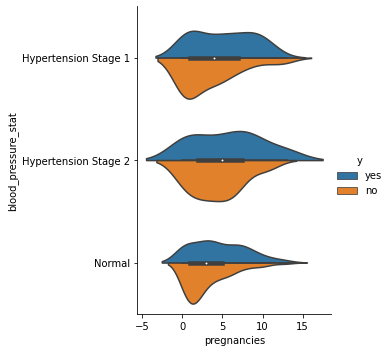

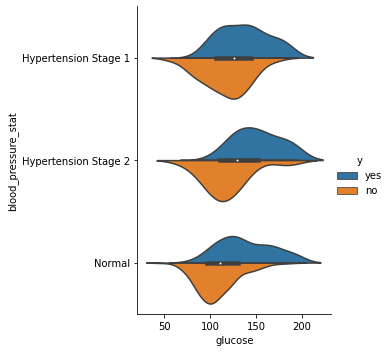

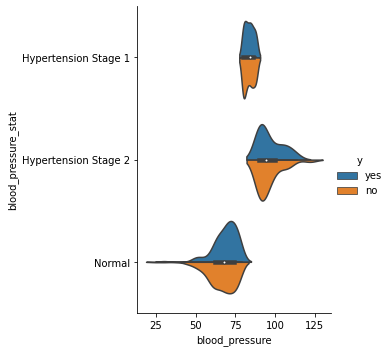

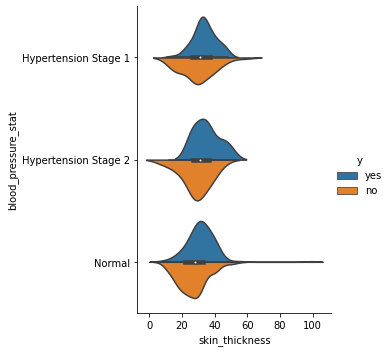

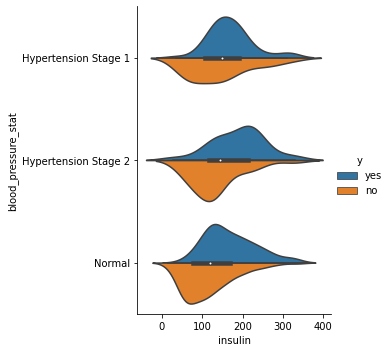

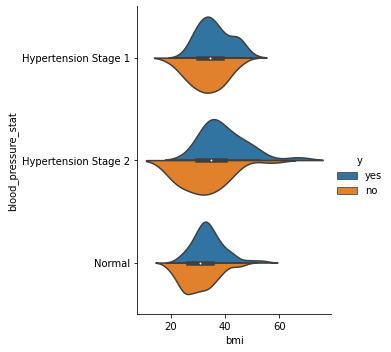

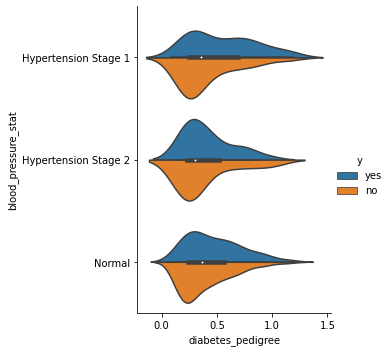

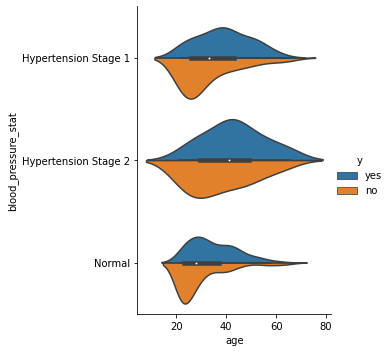

In [54]:
plt.figure(figsize = (20,10))
sns.catplot(data=df_eda, x='pregnancies', y='blood_pressure_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='glucose', y='blood_pressure_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='blood_pressure', y='blood_pressure_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='skin_thickness', y='blood_pressure_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='insulin', y='blood_pressure_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='bmi', y='blood_pressure_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='diabetes_pedigree', y='blood_pressure_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='age', y='blood_pressure_stat', hue='y',kind="violin", split=True,)
plt.show()

<Figure size 1440x720 with 0 Axes>

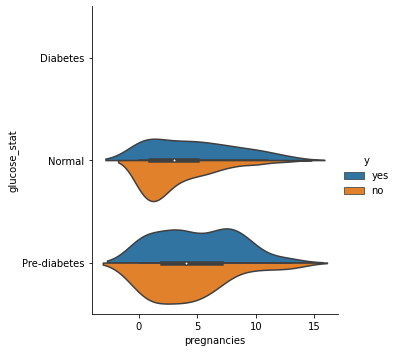

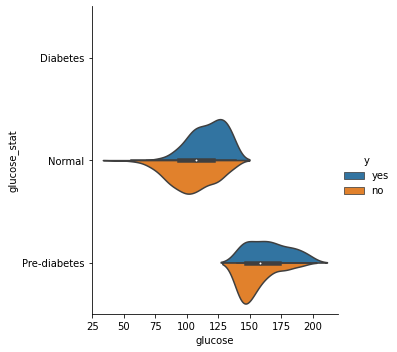

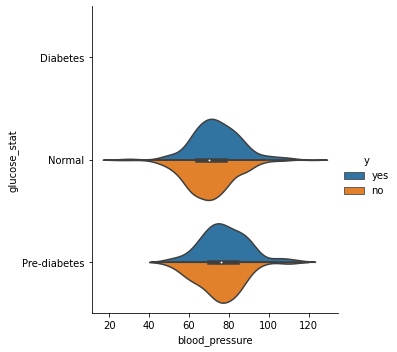

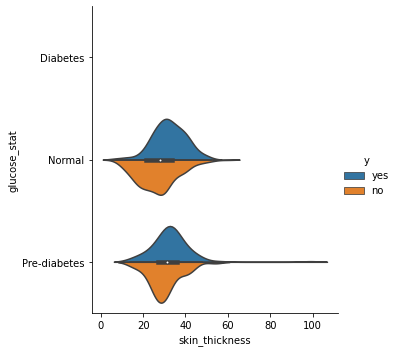

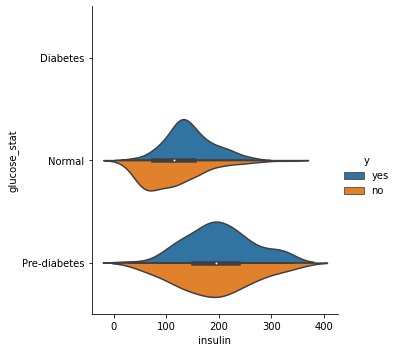

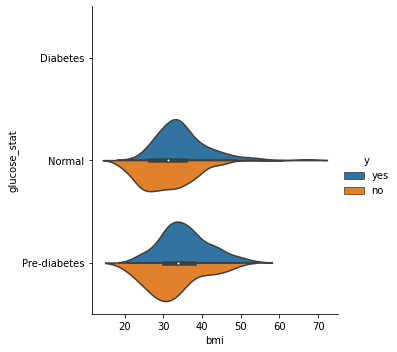

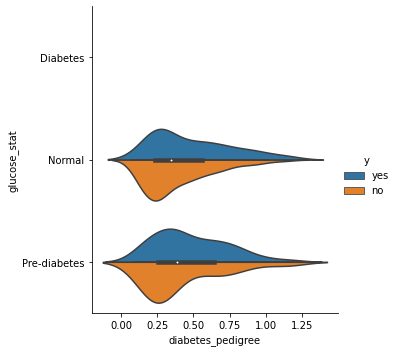

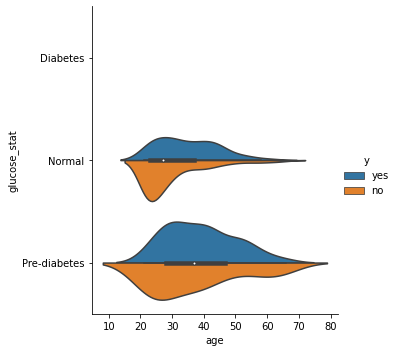

In [55]:
plt.figure(figsize = (20,10))
sns.catplot(data=df_eda, x='pregnancies', y='glucose_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='glucose', y='glucose_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='blood_pressure', y='glucose_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='skin_thickness', y='glucose_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='insulin', y='glucose_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='bmi', y='glucose_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='diabetes_pedigree', y='glucose_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='age', y='glucose_stat', hue='y',kind="violin", split=True,)
plt.show()

<Figure size 1440x720 with 0 Axes>

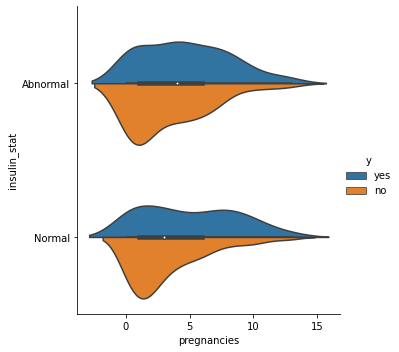

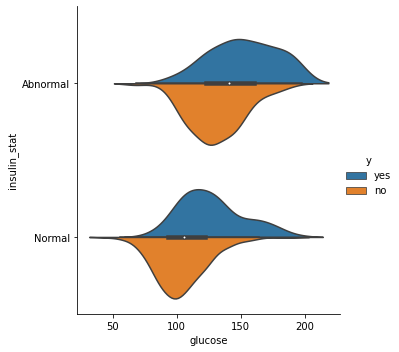

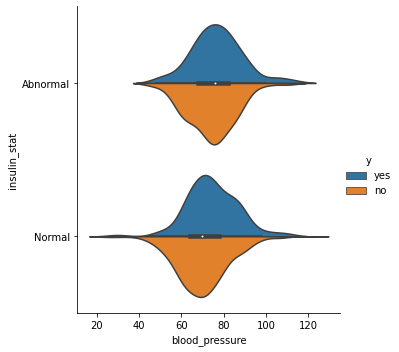

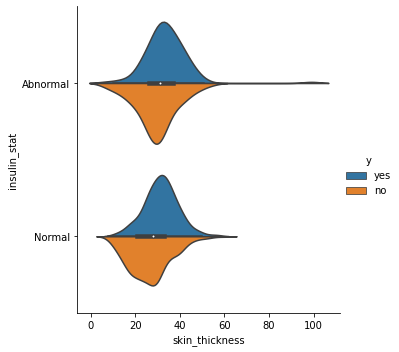

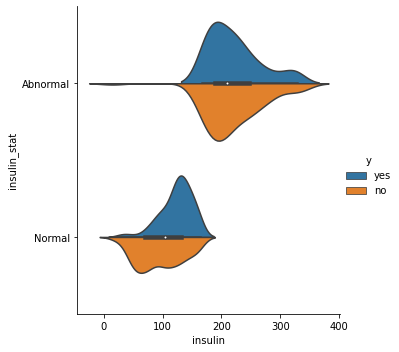

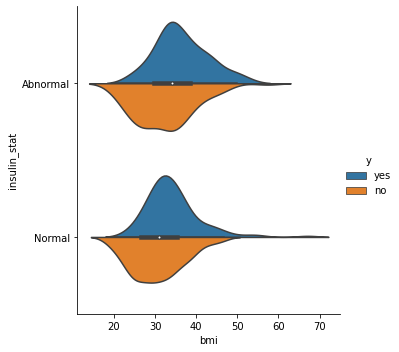

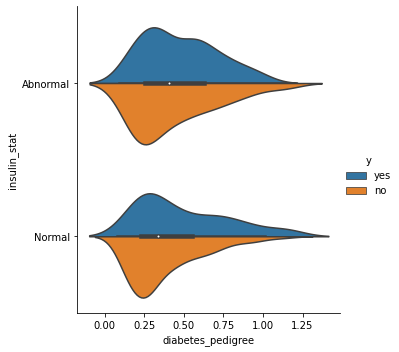

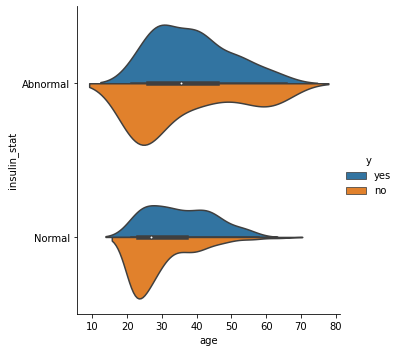

In [56]:
plt.figure(figsize = (20,10))
sns.catplot(data=df_eda, x='pregnancies', y='insulin_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='glucose', y='insulin_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='blood_pressure', y='insulin_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='skin_thickness', y='insulin_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='insulin', y='insulin_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='bmi', y='insulin_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='diabetes_pedigree', y='insulin_stat', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='age', y='insulin_stat', hue='y',kind="violin", split=True,)
plt.show()

<Figure size 1440x720 with 0 Axes>

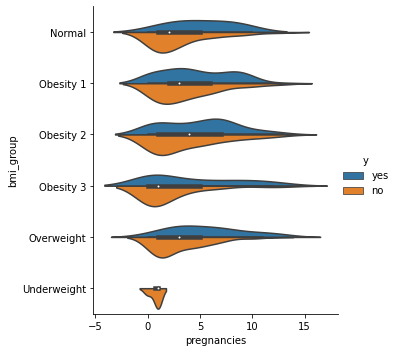

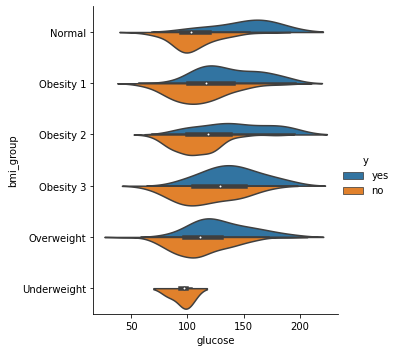

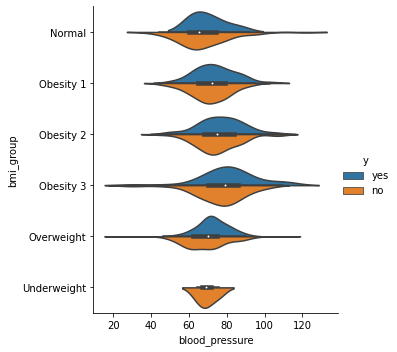

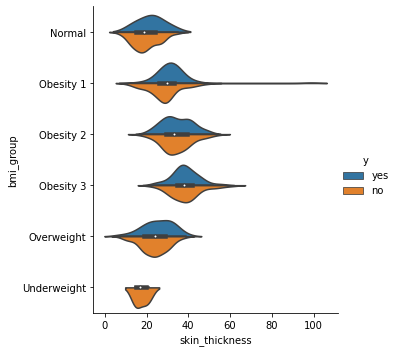

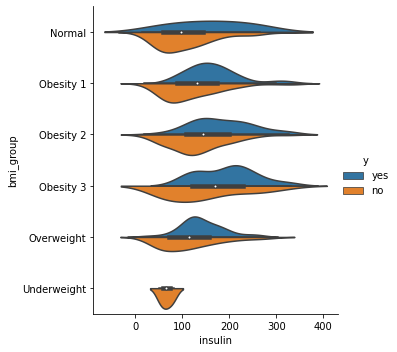

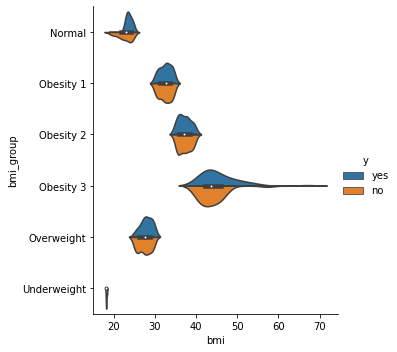

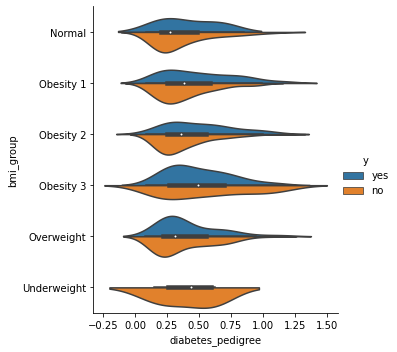

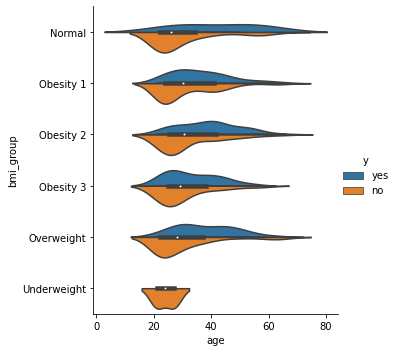

In [57]:
plt.figure(figsize = (20,10))
sns.catplot(data=df_eda, x='pregnancies', y='bmi_group', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='glucose', y='bmi_group', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='blood_pressure', y='bmi_group', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='skin_thickness', y='bmi_group', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='insulin', y='bmi_group', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='bmi', y='bmi_group', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='diabetes_pedigree', y='bmi_group', hue='y',kind="violin", split=True,)
sns.catplot(data=df_eda, x='age', y='bmi_group', hue='y',kind="violin", split=True,)
plt.show()

## **5. Multivariate Analysis**

In [58]:
df_eda1.select_dtypes(include=np.number)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,y
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0
2,8,183.0,64.0,23.4,174.6,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5,116.0,74.0,20.2,98.0,25.6,0.201,30.0,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1,126.0,60.0,33.4,134.2,30.1,0.349,47.0,1


### **Correlation Between Variables**

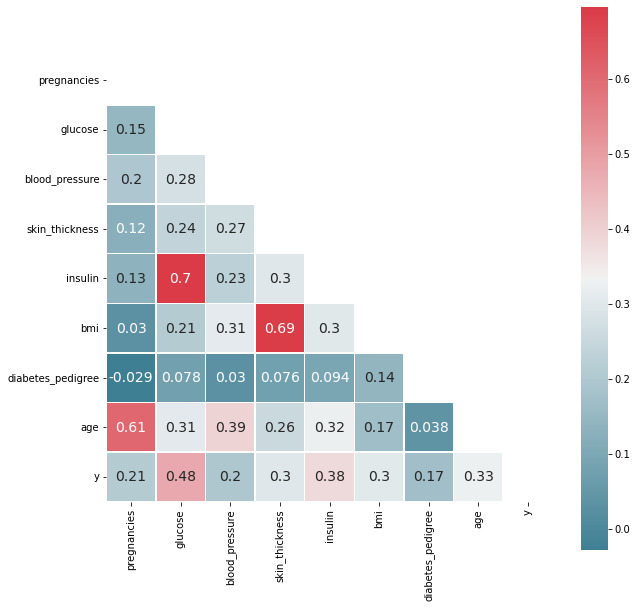

In [59]:
# calculates the correlations
correlation = df_eda1.select_dtypes(include=np.number).corr(method= 'spearman')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(10, 10)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

**Degree of Correlation**
<br> Strong : 0.50 - 1.00
<br> Medium : 0.30 - 0.49
<br> Small : < + 0.29

Source: [Statistic Solution](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/)

- All of variable have correlation with y varible (Diabetes), but the degree correlation are vary from small to medium (there are no variable that have a strong correlation with diabetes).
- There are data multi-collinearity indicated from the dataset. 'age' and 'pregnancies' with corr 0.61; 'insulin' and 'skin_thickness' with corr 0.54; 'bmi' and 'skin_thickness' with corr 0.44.
- Variables that have medium correlation with diabetes are : glucose (+), bmi (+), and age (+).
- glucose, bmi, and age have (+) correlation, this means that if these variables increase, the y variable tend to increase.  There are also a (+) correlation between pregnancies, blood_pressure, skin_thickness, insulin, and diabetes_predigree with y (small corr.)

# **Data Processing**

## **Preprocessing Scheme**

We will compare several preprocessing scheme to get the best preprocessing sheme for this dataset.
1. **Scheme 1**
  - data: 
    - data without feature engineering. (df)
  - preprocessing: 
    - No preprocessing method apply to this scheme.

2. **Scheme 2** (transformer1)
  - data: 
    - data without feature engineering. (df)
  - preprocessing: 
    - RobustScaler: 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', and 'age'

3. **Scheme 3** (transformer2)
  - data:
    - data after feature engineering. (df_eda1)
  - preprocessing:
    - One Hot Encoding: insulin_stat, glucose_stat
    - Ordinal Encoding: bmi_group, blood_pressure_stat
    - RobustScaler: 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', and 'age'

4. **Scheme 4** (transformer3)
  - data:
    - data after feature engineering. (df_eda1)
    - drop feature: insulin, glucose, bmi, blood_pressure.
  - preprocessing:
    - One Hot Encoding: insulin_stat, glucose_stat
    - Ordinal Encoding: bmi_group, blood_pressure_stat
    - RobustScaler: 'skin_thickness' and 'age'

5. **Scheme 5** (transformer4)
  - data: 
    - data without feature engineering. (df)
  - preprocessing: 
    - QuantileTransformer: 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', and 'age'


robust scaler dipilih karena perbedaan nominal data, sehingga range nominal data sama agar sensitifitas semua fitur terhadap model sama

In [60]:
scaler_var = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'age']

# transformer for preprocessing scheme 2
transformer1 = ColumnTransformer([
    ('scaler', RobustScaler(), scaler_var)
], remainder='passthrough')

In [61]:
scaler_var = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'age']
ordinal_var = ['bmi_group', 'blood_pressure_stat']
onehot_var = ['insulin_stat', 'glucose_stat']

ordinal_mapping = [
    {'col':'bmi_group',
     'mapping': {None:0,'Underweight':1,'Normal':2,'Overweight':3,'Obesity 1':4,'Obesity 2':5,'Obesity 3':6}
     },
    {'col':'blood_pressure_stat',
     'mapping':{None:0,'Normal':1,'Hypertension Stage 1':2,'Hypertension Stage 2':3}
     }]

# transformer for preprocessing scheme 3
transformer2 = ColumnTransformer([
    ('onehot', OneHotEncoder(), onehot_var),
    ('ordinal', ce.OrdinalEncoder(cols=ordinal_var, mapping=ordinal_mapping), ordinal_var),
    ('scaler', RobustScaler(), scaler_var)
], remainder='passthrough')

In [62]:
scaler_var = ['skin_thickness', 'age']
ordinal_var = ['bmi_group', 'blood_pressure_stat']
onehot_var = ['insulin_stat', 'glucose_stat']

ordinal_mapping = [
    {'col':'bmi_group',
     'mapping': {None:0,'Underweight':1,'Normal':2,'Overweight':3,'Obesity 1':4,'Obesity 2':5,'Obesity 3':6}
     },
    {'col':'blood_pressure_stat',
     'mapping':{None:0,'Normal':1,'Hypertension Stage 1':2,'Hypertension Stage 2':3}
     }]

# transformer for preprocessing scheme 3
transformer3 = ColumnTransformer([
    ('onehot', OneHotEncoder(), onehot_var),
    ('ordinal', ce.OrdinalEncoder(cols=ordinal_var, mapping=ordinal_mapping), ordinal_var),
    ('scaler', RobustScaler(), scaler_var)
], remainder='passthrough')

In [63]:
scaler_var = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age']

# transformer for preprocessing scheme 5
transformer4 = ColumnTransformer([
    ('scaler', QuantileTransformer(n_quantiles=100, random_state=2022, output_distribution='normal'), scaler_var)
], remainder='passthrough')


In [64]:
x_s1 = df.drop(columns=['y'])
y_s1 = df['y']

# Train-Test Data Splitting
x_s1_train, x_s1_test, y_s1_train, y_s1_test = train_test_split(x_s1, y_s1, stratify=y_s1, test_size=0.2, random_state = 2022)
x_s1_train.shape, x_s1_test.shape, y_s1_train.shape, y_s1_test.shape

((614, 8), (154, 8), (614,), (154,))

In [65]:
x_s2 = df.drop(columns=['y'])
y_s2 = df['y']

# Train-Test Data Splitting
x_s2_train, x_s2_test, y_s2_train, y_s2_test = train_test_split(x_s2, y_s2, stratify=y_s2, test_size=0.2, random_state = 2022)
x_s2_train.shape, x_s2_test.shape, y_s2_train.shape, y_s2_test.shape

((614, 8), (154, 8), (614,), (154,))

In [66]:
x_s3 = df_eda1.drop(columns=['y'])
y_s3 = df_eda1['y']

# Train-Test Data Splitting
x_s3_train, x_s3_test, y_s3_train, y_s3_test = train_test_split(x_s3, y_s3, stratify=y_s3, test_size=0.2, random_state = 2022)
x_s3_train.shape, x_s3_test.shape, y_s3_train.shape, y_s3_test.shape

((558, 12), (140, 12), (558,), (140,))

In [67]:
x_s4 = df_eda1.drop(columns=['insulin', 'glucose', 'bmi', 'blood_pressure', 'y'])
y_s4 = df_eda1['y']

# Train-Test Data Splitting
x_s4_train, x_s4_test, y_s4_train, y_s4_test = train_test_split(x_s4, y_s4, stratify=y_s4, test_size=0.2, random_state = 2022)
x_s4_train.shape, x_s4_test.shape, y_s4_train.shape, y_s4_test.shape

((558, 8), (140, 8), (558,), (140,))

In [68]:
x_s5 = df.drop(columns=['y'])
y_s5 = df['y']

# Train-Test Data Splitting
x_s5_train, x_s5_test, y_s5_train, y_s5_test = train_test_split(x_s5, y_s5, stratify=y_s5, test_size=0.2, random_state = 2022)
x_s5_train.shape, x_s5_test.shape, y_s5_train.shape, y_s5_test.shape

((614, 8), (154, 8), (614,), (154,))

- **Scheme 1**: x_s1_train, x_s1_test, y_s1_train, y_s1_test with no preprocessing
- **Scheme 2**: x_s2_train, x_s2_test, y_s2_train, y_s2_test with transformer1
- **Scheme 3**: x_s3_train, x_s3_test, y_s3_train, y_s3_test with transformer2
- **Scheme 4**: x_s4_train, x_s4_test, y_s4_train, y_s4_test with transformer2
- **Scheme 5**: x_s4_train, x_s5_test, y_s5_train, y_s5_test with transformer2

# **Modeling**

In [69]:
logreg = LogisticRegression(random_state= 2022)
tree = DecisionTreeClassifier(random_state = 2022)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 2022)
ada = AdaBoostClassifier(random_state = 2022)
grad = GradientBoostingClassifier(random_state = 2022)
xgboost = XGBClassifier(random_state = 2022)

skfold=StratifiedKFold(n_splits=5, random_state= 2022, shuffle=True)

## **Model Benchmarking**

### **Cross Validation K-Fold for Data Training**

#### Cross Validation for Scheme 1 - Train

In [70]:
models =[logreg, tree, knn, rf, ada, grad, xgboost]
score  =[]
avg    =[]
std    =[]

for i in models:
    estimator = Pipeline([
        ('model',i)])
    
    model_cv  = cross_val_score(estimator,
                                x_s1_train,
                                y_s1_train,
                                cv = skfold,
                                scoring = 'roc_auc')
    
    score.append(model_cv.round(3))
    avg.append(model_cv.mean())
    std.append(model_cv.std())

# Cross Validation ROC_AUC Score Train Set for Scheme 1

benchmark_train_res_s1 = pd.DataFrame({
    'Model'        :['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
    'CV Score ROC_AUC':score, 'Mean ROC_AUC':avg,'SDev':std}
    ).set_index('Model').sort_values(by='Mean ROC_AUC',ascending=False)

benchmark_train_res_s1

,CV Score ROC_AUC,Mean ROC_AUC,SDev
Model,,,
Random Forest,"[0.783, 0.876, 0.842, 0.859, 0.854]",0.842749,0.031880
Gradient Boosting,"[0.81, 0.849, 0.814, 0.867, 0.83]",0.834151,0.021453
XGBoost,"[0.807, 0.85, 0.824, 0.851, 0.838]",0.833955,0.016789
Logistic Regression,"[0.812, 0.844, 0.808, 0.86, 0.842]",0.833218,0.020070
Ada Boost Classifier,"[0.773, 0.833, 0.76, 0.855, 0.782]",0.800761,0.036770
K-Nearest Neighbor,"[0.695, 0.778, 0.786, 0.738, 0.75]",0.749272,0.032346
Decision Tree,"[0.655, 0.723, 0.594, 0.679, 0.674]",0.664994,0.041836


#### Cross Validation for Scheme 2 - Train

In [71]:
models =[logreg, tree, knn, rf, ada, grad, xgboost]
score  =[]
avg    =[]
std    =[]

for i in models:
    estimator = Pipeline([
        ('preprocessing',transformer1),
        ('model',i)])
    
    model_cv  = cross_val_score(estimator,
                                x_s2_train,
                                y_s2_train,
                                cv = skfold,
                                scoring = 'roc_auc')
    
    score.append(model_cv.round(3))
    avg.append(model_cv.mean())
    std.append(model_cv.std())

# Cross Validation ROC_AUC Score Train Set for Scheme 2

benchmark_train_res_s2 = pd.DataFrame({
    'Model'        :['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
    'CV Score ROC_AUC':score, 'Mean ROC_AUC':avg,'SDev':std}
    ).set_index('Model').sort_values(by='Mean ROC_AUC',ascending=False)

benchmark_train_res_s2

,CV Score ROC_AUC,Mean ROC_AUC,SDev
Model,,,
Random Forest,"[0.797, 0.873, 0.844, 0.843, 0.844]",0.840147,0.024509
Logistic Regression,"[0.813, 0.846, 0.817, 0.862, 0.842]",0.836301,0.018521
XGBoost,"[0.808, 0.85, 0.823, 0.851, 0.838]",0.834074,0.016645
Gradient Boosting,"[0.808, 0.848, 0.81, 0.865, 0.83]",0.832350,0.021952
Ada Boost Classifier,"[0.775, 0.833, 0.759, 0.855, 0.782]",0.800993,0.036674
K-Nearest Neighbor,"[0.696, 0.799, 0.779, 0.734, 0.638]",0.729190,0.057960
Decision Tree,"[0.66, 0.718, 0.593, 0.709, 0.68]",0.672320,0.044617


#### Cross Validation for Scheme 3 - Train

In [72]:
models =[logreg, tree, knn, rf, ada, grad, xgboost]
score  =[]
avg    =[]
std    =[]

for i in models:
    estimator = Pipeline([
        ('preprocessing',transformer2),
        ('model',i)])
    
    model_cv  = cross_val_score(estimator,
                                x_s3_train,
                                y_s3_train,
                                cv = skfold,
                                scoring = 'roc_auc')
    
    score.append(model_cv.round(3))
    avg.append(model_cv.mean())
    std.append(model_cv.std())

# Cross Validation ROC_AUC Score Train Set for Scheme 3

benchmark_train_res_s3 = pd.DataFrame({
    'Model'        :['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
    'CV Score ROC_AUC':score, 'Mean ROC_AUC':avg,'SDev':std}
    ).set_index('Model').sort_values(by='Mean ROC_AUC',ascending=False)

benchmark_train_res_s3

,CV Score ROC_AUC,Mean ROC_AUC,SDev
Model,,,
Logistic Regression,"[0.848, 0.856, 0.858, 0.783, 0.837]",0.836248,0.027463
XGBoost,"[0.871, 0.836, 0.861, 0.779, 0.835]",0.836151,0.031690
Random Forest,"[0.861, 0.842, 0.852, 0.769, 0.832]",0.831391,0.032551
Gradient Boosting,"[0.839, 0.805, 0.83, 0.753, 0.844]",0.814264,0.033315
Ada Boost Classifier,"[0.824, 0.762, 0.859, 0.736, 0.804]",0.797184,0.043565
K-Nearest Neighbor,"[0.743, 0.752, 0.806, 0.692, 0.727]",0.744054,0.036991
Decision Tree,"[0.748, 0.708, 0.616, 0.645, 0.644]",0.672067,0.048302


#### Cross Validation for Scheme 4 - Train

In [73]:
models =[logreg, tree, knn, rf, ada, grad, xgboost]
score  =[]
avg    =[]
std    =[]

for i in models:
    estimator = Pipeline([
        ('preprocessing',transformer3),
        ('model',i)])
    
    model_cv  = cross_val_score(estimator,
                                x_s4_train,
                                y_s4_train,
                                cv = skfold,
                                scoring = 'roc_auc')
    
    score.append(model_cv.round(3))
    avg.append(model_cv.mean())
    std.append(model_cv.std())

# Cross Validation ROC_AUC Score Train Set for Scheme 3

benchmark_train_res_s4 = pd.DataFrame({
    'Model'        :['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
    'CV Score ROC_AUC':score, 'Mean ROC_AUC':avg,'SDev':std}
    ).set_index('Model').sort_values(by='Mean ROC_AUC',ascending=False)

benchmark_train_res_s4

,CV Score ROC_AUC,Mean ROC_AUC,SDev
Model,,,
Logistic Regression,"[0.827, 0.824, 0.827, 0.746, 0.804]",0.805597,0.030982
XGBoost,"[0.818, 0.776, 0.818, 0.727, 0.778]",0.783278,0.033764
Gradient Boosting,"[0.813, 0.745, 0.8, 0.726, 0.808]",0.778217,0.035830
Random Forest,"[0.807, 0.767, 0.819, 0.7, 0.772]",0.772994,0.041699
Ada Boost Classifier,"[0.817, 0.744, 0.705, 0.697, 0.774]",0.747474,0.044368
K-Nearest Neighbor,"[0.69, 0.718, 0.742, 0.641, 0.715]",0.701088,0.034286
Decision Tree,"[0.664, 0.596, 0.644, 0.603, 0.575]",0.616470,0.032777


#### Cross Validation for Scheme 5 - Train

In [74]:
models =[logreg, tree, knn, rf, ada, grad, xgboost]
score  =[]
avg    =[]
std    =[]

for i in models:
    estimator = Pipeline([
        ('preprocessing',transformer4),
        ('model',i)])
    
    model_cv  = cross_val_score(estimator,
                                x_s5_train,
                                y_s5_train,
                                cv = skfold,
                                scoring = 'roc_auc')
    
    score.append(model_cv.round(3))
    avg.append(model_cv.mean())
    std.append(model_cv.std())

# Cross Validation ROC_AUC Score Train Set for Scheme 5

benchmark_train_res_s5 = pd.DataFrame({
    'Model'        :['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
    'CV Score ROC_AUC':score, 'Mean ROC_AUC':avg,'SDev':std}
    ).set_index('Model').sort_values(by='Mean ROC_AUC',ascending=False)

benchmark_train_res_s5

,CV Score ROC_AUC,Mean ROC_AUC,SDev
Model,,,
Random Forest,"[0.778, 0.876, 0.838, 0.855, 0.851]",0.839596,0.033040
Logistic Regression,"[0.816, 0.85, 0.784, 0.866, 0.855]",0.834208,0.030081
XGBoost,"[0.808, 0.849, 0.824, 0.852, 0.838]",0.834129,0.016514
Gradient Boosting,"[0.809, 0.849, 0.809, 0.87, 0.823]",0.831910,0.023957
Ada Boost Classifier,"[0.775, 0.833, 0.76, 0.855, 0.785]",0.801818,0.036193
K-Nearest Neighbor,"[0.684, 0.828, 0.709, 0.778, 0.737]",0.747265,0.050975
Decision Tree,"[0.649, 0.71, 0.594, 0.679, 0.656]",0.657614,0.038367


### **Cross Validation K-Fold for Data Testing**

#### Cross Validation for Scheme 1 - Test

In [75]:
models = [logreg, tree, knn, rf, ada, grad, xgboost]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('model',i)])
    x_s1_train,x_s1_test
    
    estimator.fit(x_s1_train,y_s1_train)
    return(estimator,estimator.predict(x_s1_test),x_s1_test)

for i,j in zip(models, ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost']):
    estimator,y_s1_pred,x_s1_test = y_pred_func(i)
    y_s1_predict = estimator.predict(x_s1_test)
    score_roc_auc.append(roc_auc_score(y_s1_test,y_s1_predict))
    
benchmark_test_res_s1 = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
             'ROC_AUC Score':score_roc_auc}).set_index('Model').sort_values(by='ROC_AUC Score',ascending=False)

benchmark_test_res_s1

,ROC_AUC Score
Model,
Logistic Regression,0.743333
Gradient Boosting,0.723333
XGBoost,0.699074
Random Forest,0.689815
Decision Tree,0.675556
Ada Boost Classifier,0.666296
K-Nearest Neighbor,0.648519


#### Cross Validation for Scheme 2 - Test

In [76]:
models = [logreg, tree, knn, rf, ada, grad, xgboost]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preproces',transformer1),
        ('model',i)])
    x_s2_train,x_s2_test
    
    estimator.fit(x_s2_train,y_s2_train)
    return(estimator,estimator.predict(x_s2_test),x_s2_test)

for i,j in zip(models, ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost']):
    estimator,y_s2_pred,x_s2_test = y_pred_func(i)
    y_s2_predict = estimator.predict(x_s2_test)
    score_roc_auc.append(roc_auc_score(y_s2_test,y_s2_predict))
    
benchmark_test_res_s2 = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
             'ROC_AUC Score':score_roc_auc}).set_index('Model').sort_values(by='ROC_AUC Score',ascending=False)

benchmark_test_res_s2

,ROC_AUC Score
Model,
Logistic Regression,0.734815
Gradient Boosting,0.713333
Random Forest,0.699074
XGBoost,0.699074
K-Nearest Neighbor,0.694815
Ada Boost Classifier,0.666296
Decision Tree,0.636296


#### Cross Validation for Scheme 3 - Test

In [77]:
models = [logreg, tree, knn, rf, ada, grad, xgboost]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preproces',transformer2),
        ('model',i)])
    x_s3_train,x_s3_test
    
    estimator.fit(x_s3_train,y_s3_train)
    return(estimator,estimator.predict(x_s3_test),x_s3_test)

for i,j in zip(models, ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost']):
    estimator,y_s3_pred,x_s3_test = y_pred_func(i)
    y_s3_predict = estimator.predict(x_s3_test)
    score_roc_auc.append(roc_auc_score(y_s3_test,y_s3_predict))
    
benchmark_test_res_s3 = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
             'ROC_AUC Score':score_roc_auc}).set_index('Model').sort_values(by='ROC_AUC Score',ascending=False)

benchmark_test_res_s3

,ROC_AUC Score
Model,
Gradient Boosting,0.721637
Logistic Regression,0.720468
Random Forest,0.703509
K-Nearest Neighbor,0.676608
XGBoost,0.671345
Ada Boost Classifier,0.660234
Decision Tree,0.628655


#### Cross Validation for Scheme 4 - Test

In [78]:
models = [logreg, tree, knn, rf, ada, grad, xgboost]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preproces',transformer3),
        ('model',i)])
    x_s4_train,x_s4_test
    
    estimator.fit(x_s4_train,y_s4_train)
    return(estimator,estimator.predict(x_s4_test),x_s4_test)

for i,j in zip(models, ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost']):
    estimator,y_s4_pred,x_s4_test = y_pred_func(i)
    y_s4_predict = estimator.predict(x_s4_test)
    score_roc_auc.append(roc_auc_score(y_s4_test,y_s4_predict))
    
benchmark_test_res_s4 = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
             'ROC_AUC Score':score_roc_auc}).set_index('Model').sort_values(by='ROC_AUC Score',ascending=False)

benchmark_test_res_s4

,ROC_AUC Score
Model,
Random Forest,0.698246
Ada Boost Classifier,0.687135
Gradient Boosting,0.670760
Logistic Regression,0.654386
XGBoost,0.638012
K-Nearest Neighbor,0.614620
Decision Tree,0.613450


#### Cross Validation for Scheme 5 - Test

In [79]:
models = [logreg, tree, knn, rf, ada, grad, xgboost]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preproces',transformer4),
        ('model',i)])
    x_s5_train,x_s5_test
    
    estimator.fit(x_s5_train,y_s5_train)
    return(estimator,estimator.predict(x_s5_test),x_s5_test)

for i,j in zip(models, ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost']):
    estimator,y_s5_pred,x_s5_test = y_pred_func(i)
    y_s5_predict = estimator.predict(x_s5_test)
    score_roc_auc.append(roc_auc_score(y_s5_test,y_s5_predict))
    
benchmark_test_res_s5 = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost'],
             'ROC_AUC Score':score_roc_auc}).set_index('Model').sort_values(by='ROC_AUC Score',ascending=False)

benchmark_test_res_s5

,ROC_AUC Score
Model,
Logistic Regression,0.729815
Gradient Boosting,0.723333
Random Forest,0.722593
XGBoost,0.699074
Decision Tree,0.670556
Ada Boost Classifier,0.666296
K-Nearest Neighbor,0.643519


### **Model Benchmaring Comparison**

In [80]:
cols1 = ['Scheme 1','Scheme 2','Scheme 3','Scheme 4','Scheme 5']
cols2 = ['Train Score', 'Test Score']
tuples = []

for i in cols1:
  for j in cols2:
    tuples.append((i,j))

benchmark_compare_model = pd.DataFrame(columns = tuples)
benchmark_compare_model.columns = pd.MultiIndex.from_tuples(benchmark_compare_model.columns, names=['Scheme','Data'])

models = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor','Random Forest', 'Ada Boost Classifier','Gradient Boosting','XGBoost']
bench_train = [benchmark_train_res_s1, benchmark_train_res_s2, benchmark_train_res_s3, benchmark_train_res_s4, benchmark_train_res_s5]
bench_test = [benchmark_test_res_s1, benchmark_test_res_s2, benchmark_test_res_s3, benchmark_test_res_s4, benchmark_test_res_s5]

for model in models:
  data = []
  for i in range(len(bench_train)):
      data.append(round(bench_train[i]['Mean ROC_AUC'][bench_train[i].index==model].values[0],4)*100)
      data.append(round(bench_test[i]['ROC_AUC Score'][bench_test[i].index==model].values[0],4)*100)
  benchmark_compare_model.loc[model] = data

benchmark_compare_model

Scheme                  Scheme 1               Scheme 2             \
Data                 Train Score Test Score Train Score Test Score   
Logistic Regression        83.32      74.33       83.63      73.48   
Decision Tree              66.50      67.56       67.23      63.63   
K-Nearest Neighbor         74.93      64.85       72.92      69.48   
Random Forest              84.27      68.98       84.01      69.91   
Ada Boost Classifier       80.08      66.63       80.10      66.63   
Gradient Boosting          83.42      72.33       83.24      71.33   
XGBoost                    83.40      69.91       83.41      69.91   

Scheme                  Scheme 3               Scheme 4             \
Data                 Train Score Test Score Train Score Test Score   
Logistic Regression        83.62      72.05       80.56      65.44   
Decision Tree              67.21      62.87       61.65      61.35   
K-Nearest Neighbor         74.41      67.66       70.11      61.46   
Random Forest              83.14      70.35       77.30      69.82   
Ada Boost Classifier       79.72      66.02       74.75      68.71   
Gradient Boosting          81.43      72.16       77.82      67.08   
XGBoost                    83.62      67.13       78.33      63.80   

Scheme                  Scheme 5             
Data                 Train Score Test Score  
Logistic Regression        83.42      72.98  
Decision Tree              65.76      67.06  
K-Nearest Neighbor         74.73      64.35  
Random Forest              83.96      72.26  
Ada Boost Classifier       80.18      66.63  
Gradient Boosting          83.19      72.33  
XGBoost                    83.41      69.91

Between 5 Preprocessing Scheme, Scheme 1 have the best score for training and testing. So, we will use Sheme 1 for further model optimization process.

Between 7 models candidate, Random Forest have the highest score in data train and Logistic Regression have the highest score in data test.

Based on the benchmark result, Random Forest has the highest mean cross validation score approximately around 84%. However, Logistic Regression has the highest ROC-AUC score on test set 74%. Therefore, Logistic Regression will be used for further processing according test set score.

In [81]:
estimator_logreg = Pipeline([
                        ('model', logreg)])

estimator_logreg.fit(x_s1_train, y_s1_train)
y_predict_logreg = estimator_logreg.predict(x_s1_test)

print(confusion_matrix(y_s1_test, y_predict_logreg))
print('Logistic Regression ROC-AUC Score : ',round(roc_auc_score(y_s1_test, y_predict_logreg),4)*100,'%')

logreg_cv = (cross_val_score(estimator_logreg,x_s1_train,y_s1_train,cv=skfold,scoring='roc_auc').mean())
print('Logistic Regression CV Mean Score : ',round(logreg_cv, 3))

[[82 18]
 [18 36]]
Logistic Regression ROC-AUC Score :  74.33 %
Logistic Regression CV Mean Score :  0.833


In [82]:
estimator_grad = Pipeline([
                        ('model', grad)])

estimator_grad.fit(x_s1_train, y_s1_train)
y_predict_grad = estimator_grad.predict(x_s1_test)

print(confusion_matrix(y_s1_test, y_predict_grad))
print('Gradient Boosting ROC-AUC Score : ',round(roc_auc_score(y_s1_test, y_predict_grad),4)*100,'%')

grad_cv = (cross_val_score(estimator_grad,x_s1_train,y_s1_train,cv=skfold,scoring='roc_auc').mean())
print('Gradient Boosting CV Mean Score : ',round(grad_cv, 3))

[[78 22]
 [18 36]]
Gradient Boosting ROC-AUC Score :  72.33000000000001 %
Gradient Boosting CV Mean Score :  0.834


In [83]:
estimator_xgboost = Pipeline([
                        ('model', xgboost)])

estimator_xgboost.fit(x_s1_train, y_s1_train)
y_predict_xgboost = estimator_xgboost.predict(x_s1_test)

print(confusion_matrix(y_s1_test, y_predict_xgboost))
print('XGBoost ROC-AUC Score : ',round(roc_auc_score(y_s1_test, y_predict_xgboost),4)*100,'%')

xgboost_cv = (cross_val_score(estimator_xgboost,x_s1_train,y_s1_train,cv=skfold,scoring='roc_auc').mean())
print('XGBoost CV Mean Score : ',round(xgboost_cv, 3))

[[75 25]
 [19 35]]
XGBoost ROC-AUC Score :  69.91000000000001 %
XGBoost CV Mean Score :  0.834


## **Hyperparameter Tuning**

Since we obtain ROC-AUC ~74% from Logistic Regression model, we would like to increase the model's performance by using hyperparameter tuning. If the score improved, then the best parameters from this tuning will be used in the final model.

### **Model: Logistic Regression**

In [84]:
lr_estimator = Pipeline([
    ('model', logreg)])

hyperparam_space = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [ 1, 0.5, 0.1, 0.05, 0.01],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'model__class_weight': [None, 'balanced'],
    'model__max_iter': [100, 200, 300],
    'model__multi_class': ['auto', 'ovr', 'multinomial'],
    'model__random_state': [2022]
}

grid_lr = GridSearchCV(
                lr_estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'roc_auc',
                n_jobs = -1)

grid_lr.fit(x_s1_train, y_s1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=2022))]),
             n_jobs=-1,
             param_grid={'model__C': [1, 0.5, 0.1, 0.05, 0.01],
                         'model__class_weight': [None, 'balanced'],
                         'model__max_iter': [100, 200, 300],
                         'model__multi_class': ['auto', 'ovr', 'multinomial'],
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__random_state': [2022],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc')

In [85]:
print('best score', grid_lr.best_score_)
print('best param', grid_lr.best_params_)

best score 0.8399889258028793
best param {'model__C': 0.05, 'model__class_weight': 'balanced', 'model__max_iter': 100, 'model__multi_class': 'multinomial', 'model__penalty': 'l2', 'model__random_state': 2022, 'model__solver': 'lbfgs'}


Here's logistic regression's best parameters for this case:
- C score is 0.05.
- The solver is lbfgs.
- The class_weight is balanced.
- The max_iter is 100.
- The multi_class is multinomial.
- The random_state is 2022.
- The model penalty is l2

In [86]:
lr_estimator.fit(x_s1_train, y_s1_train)
roc_auc_logreg = (roc_auc_score(y_s1_test, lr_estimator.predict(x_s1_test)))

grid_lr.best_estimator_.fit(x_s1_train, y_s1_train)
roc_auc_grid = (roc_auc_score(y_s1_test, grid_lr.predict(x_s1_test)))

score_list = [roc_auc_logreg, roc_auc_grid]
method_name = ['Logistic Regression Before Tuning', 'Logistic Regression After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Logistic Regression Before Tuning,0.743333
1,Logistic Regression After Tuning,0.721111


This is the comparison between before tuning score and after tuning score using Logistic Regression. There is no improvement in ROC AUC Score between the model results before and after hyperparameter tuning. We choose to use Logistic Regression before tuning score in this section.

### **Model: Gradient Boosting**

Source: [Medium - Mohtadi Ben Fraj](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae)

In [87]:
grad_estimator = Pipeline([
    ('model', grad)])

hyperparam_space = {
    'model__learning_rate': [1, 0.5, 0.1, 0.05, 0.01],
    'model__n_estimators': [1, 16, 64, 200],
    'model__max_depth': np.linspace(1,5,5,endpoint=True),
    'model__min_samples_split': np.linspace(0.1,1,5,endpoint=True),
    'model__min_samples_leaf': np.linspace(0.1,0.5,5,endpoint=True),
    'model__random_state': [2022]
}

grid_grad = GridSearchCV(
                grad_estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'roc_auc',
                n_jobs = -1)

grid_grad.fit(x_s1_train, y_s1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model',
                                        GradientBoostingClassifier(random_state=2022))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [1, 0.5, 0.1, 0.05, 0.01],
                         'model__max_depth': array([1., 2., 3., 4., 5.]),
                         'model__min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'model__min_samples_split': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                         'model__n_estimators': [1, 16, 64, 200],
                         'model__random_state': [2022]},
             scoring='roc_auc')

In [88]:
print('best score', grid_grad.best_score_)
print('best param', grid_grad.best_params_)

best score 0.8553979789590255
best param {'model__learning_rate': 0.1, 'model__max_depth': 2.0, 'model__min_samples_leaf': 0.1, 'model__min_samples_split': 0.325, 'model__n_estimators': 64, 'model__random_state': 2022}


Here's Gradient Boosting's best parameters for this case:
- learning_rate: 0.1
- max_depth: 2.0
- min_samples_leaf: 0.1
- min_samples_split: 0.325
- n_estimators: 64
- random_state': 2022

In [89]:
grad_estimator.fit(x_s1_train, y_s1_train)
roc_auc_grad = (roc_auc_score(y_s1_test, grad_estimator.predict(x_s1_test)))

grid_grad.best_estimator_.fit(x_s1_train, y_s1_train)
roc_auc_grid = (roc_auc_score(y_s1_test, grid_grad.predict(x_s1_test)))

score_list = [roc_auc_grad, roc_auc_grid]
method_name = ['Gradient Boosting Before Tuning', 'Bradient Boosting After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Gradient Boosting Before Tuning,0.723333
1,Bradient Boosting After Tuning,0.729074


### **Model: XGBoost**

Source: [Kaggle](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook#3.-Basic-Setup-)

In [90]:
xgb_estimator = Pipeline([
    ('model', xgboost)])

hyperparam_space = {
    'model__gamma': [0,0.1,1,10,100],
    'model__learning_rate': [0.01, 0.1, 0.5, 0.7],
    'model__max_depth': [5,10,14],
    'model__n_estimators': [50,100,150],
    'model__reg_alpha': [0,0.1,1,10,100],
    'model__reg_lambda': [0,0.1,1,10,100]
}

grid_xgb = GridSearchCV(
                xgb_estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'roc_auc',
                n_jobs = -1)

grid_xgb.fit(x_s1_train, y_s1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model',
                                        XGBClassifier(random_state=2022))]),
             n_jobs=-1,
             param_grid={'model__gamma': [0, 0.1, 1, 10, 100],
                         'model__learning_rate': [0.01, 0.1, 0.5, 0.7],
                         'model__max_depth': [5, 10, 14],
                         'model__n_estimators': [50, 100, 150],
                         'model__reg_alpha': [0, 0.1, 1, 10, 100],
                         'model__reg_lambda': [0, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [91]:
print('best score', grid_xgb.best_score_)
print('best param', grid_xgb.best_params_)

best score 0.8528543743078627
best param {'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 50, 'model__reg_alpha': 0, 'model__reg_lambda': 0.1}


Here's XGBoost's best parameters for this case:
- gamma: 0
- learning_rate: 0.1
- max_depth: 5
- n_estimators: 50
- reg_alpha: 0
- reg_lambda: 0.1

In [92]:
xgb_estimator.fit(x_s1_train, y_s1_train)
roc_auc_xgb = (roc_auc_score(y_s1_test, xgb_estimator.predict(x_s1_test)))

grid_xgb.best_estimator_.fit(x_s1_train, y_s1_train)
roc_auc_grid = (roc_auc_score(y_s1_test, grid_xgb.predict(x_s1_test)))

score_list = [roc_auc_xgb, roc_auc_grid]
method_name = ['XGBoost Before Tuning', 'XGBoost After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,XGBoost Before Tuning,0.699074
1,XGBoost After Tuning,0.694815


## **Try Using Undersampling and Oversampling**

In [93]:
def calc_train_error(x_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(x_train)
    roc_auc = roc_auc_score(y_train, predictions)
    return { 
        'roc': roc_auc, 
    }
    
def calc_validation_error(x_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(x_test)
    roc_auc = roc_auc_score(y_test, predictions)
    return { 
        'roc': roc_auc, 
    }
    
def calc_metrics(x_train, y_train, x_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(x_train, y_train)
    train_error = calc_train_error(x_train, y_train, model)
    validation_error = calc_validation_error(x_test, y_test, model)
    return train_error, validation_error

In [94]:
data = x_s1_train
target = y_s1_train

In [95]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

train_errors_with_undersampling = []
validation_errors_with_undersampling = []

train_errors_with_smote = []
validation_errors_with_smote = []

# print(len(x_val), (len(x_train) + len(x_val)))
ros = RandomOverSampler(random_state=2022)
rus = RandomUnderSampler(random_state=2022)

    
for train_index, val_index in skfold.split(data, target):
    
    # split data
    x_train, x_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    X_ros, Y_ros = ros.fit_resample(x_s1_train, y_s1_train)
    X_rus, Y_rus = rus.fit_resample(x_s1_train, y_s1_train)

    # instantiate model ros
    ros_estimator = Pipeline([
        ('balancing',ros),
        ('model',logreg)])

    # instantiate model rus
    rus_estimator = Pipeline([
        ('balancing',rus),
        ('model',logreg)])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(x_train, y_train, x_val, y_val, lr_estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, x_val, y_val, ros_estimator)
    train_error_with_undersampling, val_error_with_undersampling = calc_metrics(X_rus, Y_rus, x_val, y_val, rus_estimator)

    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

    train_errors_with_undersampling.append(train_error_with_undersampling)
    validation_errors_with_undersampling.append(val_error_with_undersampling)


In [96]:
listItem_notreat = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem_notreat.append([tr['roc'],val['roc']])

listItem_notreat.append(list(np.mean(listItem_notreat,axis=0)))
listItem_notreat.append(list(np.std(listItem_notreat,axis=0)))
    
dfEvaluate_notreat = pd.DataFrame(listItem_notreat, 
                     columns=['Train ROC AUC', 
                              'Test ROC AUC', 
                             ])

listIndex = list(dfEvaluate_notreat.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'Std'
dfEvaluate_notreat.index = listIndex
dfEvaluate_notreat

,Train ROC AUC,Test ROC AUC
0,0.734585,0.692442
1,0.726014,0.715698
2,0.737911,0.726453
3,0.721126,0.770203
4,0.728198,0.718155
Average,0.729567,0.724590
Std,0.005486,0.023231


In [97]:
listItem_ros = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem_ros.append([tr['roc'],val['roc']])

listItem_ros.append(list(np.mean(listItem_ros,axis=0)))
listItem_ros.append(list(np.std(listItem_ros,axis=0)))
    
dfEvaluate_ros = pd.DataFrame(listItem_ros, 
                    columns=[
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            ])

listIndex = list(dfEvaluate_ros.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'Std'
dfEvaluate_ros.index = listIndex
dfEvaluate_ros

,Train ROC AUC,Test ROC AUC
0,0.75,0.740843
1,0.75,0.734593
2,0.75,0.697965
3,0.75,0.796221
4,0.75,0.824107
Average,0.75,0.758746
Std,0.00,0.041382


In [98]:
ros_estimator.fit(X_ros, Y_ros)
y_predict_ros = ros_estimator.predict(x_s1_test)

In [99]:
print(confusion_matrix(y_s1_test, y_predict_ros))
print('Logistic Regression_ROS ROC-AUC Score : ', round(roc_auc_score(y_s1_test, y_predict_ros),3)*100,'%')

lr_cv_ros = (cross_val_score(ros_estimator,X_ros,Y_ros,cv=skfold,scoring='roc_auc').mean())
print('Logistic Regression_ROS CV Mean Score : ', lr_cv_ros)

[[65 35]
 [12 42]]
Logistic Regression_ROS ROC-AUC Score :  71.39999999999999 %
Logistic Regression_ROS CV Mean Score :  0.8305312500000002


In [100]:
listItem_rus = []

for tr,val in zip(train_errors_with_undersampling,validation_errors_with_undersampling) :
    listItem_rus.append([tr['roc'],val['roc']])

listItem_rus.append(list(np.mean(listItem_rus,axis=0)))
listItem_rus.append(list(np.std(listItem_rus,axis=0)))
    
dfEvaluate_rus = pd.DataFrame(listItem_rus, 
                    columns=[
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            ])

listIndex = list(dfEvaluate_rus.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'Std'
dfEvaluate_rus.index = listIndex
dfEvaluate_rus

,Train ROC AUC,Test ROC AUC
0,0.773364,0.736337
1,0.773364,0.758721
2,0.773364,0.739971
3,0.773364,0.819477
4,0.773364,0.800298
Average,0.773364,0.770961
Std,0.000000,0.030341


In [101]:
rus_estimator.fit(X_rus, Y_rus)
y_predict_rus = rus_estimator.predict(x_s1_test)

In [102]:
print(confusion_matrix(y_s1_test, y_predict_rus))
score_under = roc_auc_score(y_s1_test, y_predict_rus)
print('Logistic Regression_RUS ROC-AUC Score : ', round(roc_auc_score(y_s1_test, y_predict_rus),3)*100,'%')

lr_cv_rus = (cross_val_score(rus_estimator,X_rus,Y_rus,cv=skfold,scoring='roc_auc').mean())
print('Logistic Regression_RUS CV Mean Score : ', lr_cv_rus)

[[69 31]
 [14 40]]
Logistic Regression_RUS ROC-AUC Score :  71.5 %
Logistic Regression_RUS CV Mean Score :  0.8255427644286486


In [103]:
print('No Treatment')
print(confusion_matrix(y_s1_test, lr_estimator.predict(x_s1_test)))
print('Logistic Regression_NoTreat ROC-AUC Score : ', round(roc_auc_score(y_s1_test, lr_estimator.predict(x_s1_test)),3)*100,'%')

lr_cv = (cross_val_score(lr_estimator,x_train,y_train,cv=skfold,scoring='roc_auc').mean())
print('Logistic Regression_NoTreat CV Mean Score : ', round(lr_cv,3))

print('\n\nRandom Over Sampling')
print(confusion_matrix(y_s1_test, y_predict_ros))
print('Logistic Regression_ROS ROC-AUC Score     : ', round(roc_auc_score(y_s1_test, y_predict_ros),3)*100,'%')
print('Logistic Regression_ROS CV Mean Score     : ', round(lr_cv_ros,3))

print('\n\nRandom Under Sampling')
print(confusion_matrix(y_s1_test, y_predict_rus))
print('Logistic Regression_RUS ROC-AUC Score     : ', round(roc_auc_score(y_s1_test, y_predict_rus),3)*100,'%')
print('Logistic Regression_RUS CV Mean Score     : ', round(lr_cv_rus,3))

No Treatment
[[69 31]
 [14 40]]
Logistic Regression_NoTreat ROC-AUC Score :  71.5 %
Logistic Regression_NoTreat CV Mean Score :  0.836


Random Over Sampling
[[65 35]
 [12 42]]
Logistic Regression_ROS ROC-AUC Score     :  71.39999999999999 %
Logistic Regression_ROS CV Mean Score     :  0.831


Random Under Sampling
[[69 31]
 [14 40]]
Logistic Regression_RUS ROC-AUC Score     :  71.5 %
Logistic Regression_RUS CV Mean Score     :  0.826


## **Feature Selection**

In [104]:
features = x_s1_train.columns
coef_table = pd.DataFrame({'coef': grid_lr.best_estimator_[0].coef_.flatten()}, index = features)
grid_logreg = abs(coef_table).sort_values('coef', ascending = False)

In [105]:
grid_logreg

,coef
diabetes_pedigree,0.182371
pregnancies,0.079269
bmi,0.046847
glucose,0.017260
blood_pressure,0.009429
age,0.002952
skin_thickness,0.000938
insulin,0.000217


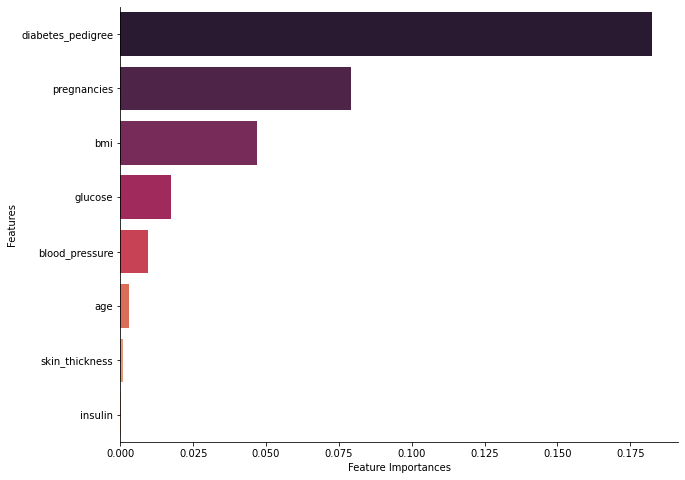

In [106]:
plt.figure(figsize=(10,8))
sns.barplot(x=grid_logreg['coef'], y=grid_logreg.index[0:], palette="rocket")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

Based on selecting features through coefficient score, We decided to drop 2 features manually who gets a score under 0.1 for all answer choices for every feature. There are insulin and skin_thickness.

## **Re-run using Feature Selection**

***Preprocessing Scheme***

- RobustScaler: pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age.
- Target: y

In [107]:
df_tuning = df.copy()
df_tuning.drop(columns = ['insulin', 'skin_thickness'], inplace = True)
df_tuning.head()

,pregnancies,glucose,blood_pressure,bmi,diabetes_pedigree,age,y
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [108]:
x_select = df_tuning.drop('y', axis = 1)
y_select = df_tuning['y']

In [109]:
x_select_train, x_select_test, y_select_train, y_select_test = train_test_split(x_select,y_select,
                                                   stratify = y_select,
                                                    test_size = 0.2,
                                                   random_state = 2022)

In [110]:
logreg_tuning = LogisticRegression(C = 0.05, class_weight = 'balanced', max_iter = 100,
                                   multi_class = 'multinomial', random_state = 2022, solver = 'lbfgs', penalty='l2')
logreg_select_pipe = Pipeline([('model', logreg_tuning)])
logreg_select_pipe.fit(x_select_train, y_select_train)
print('After Feature Selection Process, the score is ', roc_auc_score(y_select_test, logreg_select_pipe.predict(x_select_test)))

After Feature Selection Process, the score is  0.7438888888888888


The score that used as a reference for predicting is 0.7439, which is larger than the tuning score before (0.7433).

## **Logistic Optimize Treshold**

In [116]:
df_th = df.copy()
x_th = df_th.drop(['insulin', 'skin_thickness','y'], axis = 1)
y_th = df_th['y']
x_th_train, x_th_test, y_th_train, y_th_test = train_test_split(x_th, y_th,
                                                   stratify = y_th,
                                                    test_size = 0.2,
                                                   random_state = 2022)

best score 0.8399889258028793
best param {'model__C': 0.05, 'model__class_weight': 'balanced', 'model__max_iter': 100, 'model__multi_class': 'multinomial', 'model__penalty': 'l2', 'model__random_state': 2022, 'model__solver': 'lbfgs'}

In [117]:
logreg_treshold = LogisticRegression(C = 0.05, class_weight = 'balanced', max_iter = 100,
                                   multi_class = 'multinomial', random_state = 2022, solver = 'lbfgs', penalty='l2')
logreg_pipe_treshold = Pipeline([('model', logreg)])
model = logreg_pipe_treshold.fit(x_th_train, y_th_train)

In [118]:
th_value = [i/100 for i in range(20,61)]
score = 0
score_list = []

for i in th_value:
    # perhitungan score
    y_prob = model.predict_proba(x_th_test)[:,1]
    y_pred = np.where(y_prob>i, 1, 0)
    score_temp = roc_auc_score(y_th_test, y_pred)
    
    # penyimpanan hasil score
    score_list.append(score_temp)
    
    # comparasi: penentuan score terbaik
    if score_temp > score:
        score = score_temp
        best_th = i

In [119]:
print('best score = ',score)
print('best treshold = ',best_th)

best score =  0.7483333333333332
best treshold =  0.47


Text(0.5, 1.0, 'Optimasi Treshold')

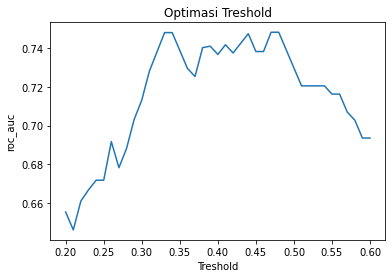

In [120]:
sns.lineplot(th_value, score_list)
plt.xlabel('Treshold')
plt.ylabel('roc_auc')
plt.title('Optimasi Treshold')

In [136]:
logreg_final = LogisticRegression(C = 0.05, class_weight = 'balanced', max_iter = 100,
                                   multi_class = 'multinomial', random_state = 2022, solver = 'lbfgs', penalty='l2')
logreg_final_pipe = Pipeline([('model', logreg_final)])
logreg_final_pipe.fit(x_select_train, y_select_train)
print('After Feature Selection Process, the score is ', roc_auc_score(y_select_test, logreg_final_pipe.predict(x_select_test)))

After Feature Selection Process, the score is  0.7438888888888888


In [143]:
evaluation_metrics = ['Accuracy','precision','recall','F1 Score','ROC-AUC']
evaluation_value = [
    round(accuracy_score(y_select_test, logreg_final_pipe.predict(x_select_test))*100,2),
    round(precision_score(y_select_test, logreg_final_pipe.predict(x_select_test))*100,2),
    round(recall_score(y_select_test, logreg_final_pipe.predict(x_select_test))*100,2),
    round(f1_score(y_select_test, logreg_final_pipe.predict(x_select_test))*100,2),
    round(roc_auc_score(y_select_test, logreg_final_pipe.predict(x_select_test))*100,2)
]

final_score = pd.DataFrame(index=evaluation_metrics, data=evaluation_value, columns=['Score']).T
final_score

,Accuracy,precision,recall,F1 Score,ROC-AUC
Score,73.38,59.15,77.78,67.2,74.39


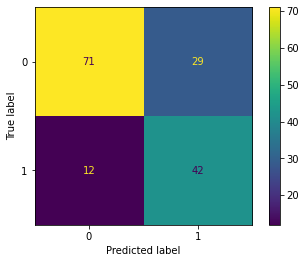

In [151]:
plot_confusion_matrix(logreg_final_pipe,x_select_test,y_select_test)

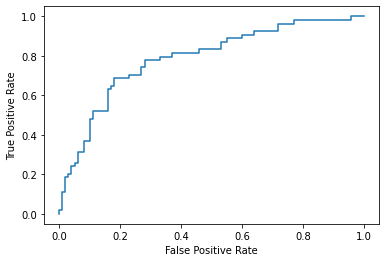

In [152]:
#define metrics
y_pred_proba = logreg_final_pipe.predict_proba(x_select_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_select_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Conclusion**

The best model for predicting diabetes:<br>
**Model**: Logistic Regression<br>
**Feature**: pregnancies, glucose, blood_pressure, bmi, diabetes_pedigree, age	
**Preprocesing Scheme**: No Preprocessing Scheme<br>
**Hyperparameter**:
  - C score is 0.05.
  - The solver is lbfgs.
  - The class_weight is balanced.
  - The max_iter score is 100.
  - The multi_class is multinomial.
  - The random_state is 2022.
  - The model penalty is l2

Treshold: 0.5

# **Deployment**

In [ ]:
logreg_select_pipe.fit(x_select, y_select)

In [ ]:
file_name = 'Final_Project.pkl'

pickle.dump(logreg_select_pipe, open(file_name,'wb'))

In [ ]:
loaded_model = pickle.load(open(file_name,'rb'))
loaded_model.predict(x_select_test)

In [ ]:
df_predict = pd.DataFrame({
    'pregnancies': [2],
    'glucose': [154],
    'blood_pressure': [82],
    'bmi': [23.4],
    'diabetes_pedigree': [0.737],
    'age': [25],
})

In [ ]:
df_predict

In [ ]:
loaded_model.predict(df_predict)

In [ ]:
loaded_model.predict_proba(df_predict)

# **Recommendation**

**NOTES**

- multicollinearity in logistic regression:

https://medium.com/analytics-vidhya/removing-multi-collinearity-for-linear-and-logistic-regression-f1fa744f3666

- 

In [162]:
%%shell
jupyter nbconvert --to html ///content/Diabetes_Prediction_Team_Kuda_Tinta.ipynb

[NbConvertApp] Converting notebook ///content/Diabetes_Prediction_Team_Kuda_Tinta.ipynb to html
[NbConvertApp] Writing 3928747 bytes to ///content/Diabetes_Prediction_Team_Kuda_Tinta.html
